In [ ]:
rsync -avzhe ssh \
conchae@garnatxa.srv.cpd:/home/conchae/software/multiPhATE2/PipelineOutput \
/media/concha-eloko/Linux/PPT_clean/in_vitro


In [1]:
from transformers import AutoModelForTokenClassification, AutoTokenizer
import torch
from torch import nn 
import torch.nn.functional as F

import os
import numpy as np
import tqdm
import matplotlib.pyplot as plt
from DepoScope_functions import Dpo_classifier , find_longest_non_zero_suite_with_n_zeros , predict_sequence, plot_token

import warnings
warnings.filterwarnings("ignore") 

path_work = "/media/concha-eloko/Linux/depolymerase_building"

esm2_model_path = f"{path_work}/esm2_t12_35M_UR50D-finetuned-depolymerase.labels_4/checkpoint-6015"
DpoDetection_path = f"{path_work}/DepoDetection.T12.4Labels.1908.model"

tokenizer = AutoTokenizer.from_pretrained(esm2_model_path)
esm2_finetuned = AutoModelForTokenClassification.from_pretrained(esm2_model_path)

/media/concha-eloko/Linux/conda_envs/ML_work/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_classifier = Dpo_classifier(esm2_finetuned) # Create an instance of Dpo_classifier
model_classifier.load_state_dict(torch.load(DpoDetection_path), strict = False) # Load the saved weights ; weird Error with some of the keys 
model_classifier.eval() # Set the model to evaluation mode for inference


Dpo_classifier(
  (pretrained_model): EsmForTokenClassification(
    (esm): EsmModel(
      (embeddings): EsmEmbeddings(
        (word_embeddings): Embedding(33, 480, padding_idx=1)
        (dropout): Dropout(p=0.0, inplace=False)
        (position_embeddings): Embedding(1026, 480, padding_idx=1)
      )
      (encoder): EsmEncoder(
        (layer): ModuleList(
          (0-11): 12 x EsmLayer(
            (attention): EsmAttention(
              (self): EsmSelfAttention(
                (query): Linear(in_features=480, out_features=480, bias=True)
                (key): Linear(in_features=480, out_features=480, bias=True)
                (value): Linear(in_features=480, out_features=480, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
                (rotary_embeddings): RotaryEmbedding()
              )
              (output): EsmSelfOutput(
                (dense): Linear(in_features=480, out_features=480, bias=True)
                (dropout): Dropout(p=0.0, inpla

In [3]:
path_out = "/media/concha-eloko/Linux/PPT_clean/in_vitro/Laura"
from Bio import SeqIO
from tqdm import tqdm 

prediction_results = {}
for phage in tqdm(os.listdir(path_out)) :
    fastas = SeqIO.parse(f"{path_out}/{phage}/{phage}_cgp_protein.faa" , "fasta")
    tmp_results = []
    for record in fastas :
        protein_seq = str(record.seq)
        if len(protein_seq) >= 200 :
            prediction, sequence_outputs = predict_sequence(model_classifier, protein_seq)
            if prediction[0] == 1 :
                a = (prediction , record.id)
                tmp_results.append(a)
            else :
                pass
    prediction_results[phage] = tmp_results

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 41/41 [07:50<00:00, 11.47s/it]


In [1]:
prediction_results = {'Kpn13-P1_node2_spades': [],
 'Kpn26-P2_node1_spades': [],
 'Kpn13-P1_node1_spades': [],
 'Kpn26-P3_node1_spades': [((1.0, 1.0), 'cds3/-/1/2289')],
 'Kpn5-P1_node1_spades': [((1.0, 1.0), 'cds21/+/1/2376'),
  ((1.0, 1.0), 'cds26/+/1/3732')],
 'Kpn5-P2_node2_spades': [],
 'KPN10P1_node1_spades': [],
 'Kpn16-P2_node1_spades': [((1.0, 1.0), 'cds55/-/1/2526')],
 'Kpn10-P2_node1_spades': [((1.0, 1.0), 'cds32/+/1/2289')],
 'Kpn13-P2_node1_spades': [],
 'KPN25P1_node1_unicycler': [((1.0, 1.0), 'cds40/-/1/1983'),
  ((1.0, 1.0), 'cds52/-/1/2382')],
 'Kpn2-P4_node2_spades': [((1.0, 1.0), 'cds42/-/1/1080')],
 'Kpn1-P4_node2_spades': [((1.0, 1.0), 'cds42/-/1/1080')],
 'Kpn2-P1_node2_spades': [((1.0, 1.0), 'cds21/+/1/1080')],
 'Kpn30-P3_node1_unicycler': [],
 'Kpn24-P2_node1_spades': [],
 'Kpn7-P2_node1_spades': [((1.0, 1.0), 'cds40/-/1/4056')],
 'Kpn13-P2_node2_spades': [],
 'Kpn30-P2_node1_unicycler': [((1.0, 0.9999434947967529), 'cds11/-/1/3054'),
  ((1.0, 1.0), 'cds16/-/1/2430')],
 'Kpn16-P3_node1_spades': [((1.0, 1.0), 'cds33/+/1/2376'),
  ((1.0, 0.9999434947967529), 'cds38/+/1/3054')],
 'Kpn2-P4_node1_spades': [((1.0, 1.0), 'cds32/+/1/2436'),
  ((1.0, 0.9999434947967529), 'cds37/+/1/3054')],
 'Kpn7-P1_node1_spades': [((1.0, 1.0), 'cds21/+/1/2376'),
  ((1.0, 1.0), 'cds26/+/1/3732')],
 'Kpn9-P3_node1_spades': [],
 'Kpn16-P1_node1_unicycler': [((1.0, 1.0), 'cds37/+/1/2376'),
  ((1.0, 0.9999434947967529), 'cds43/+/1/3054')],
 'KPN35P4_node1_spades': [],
 'Kpn9-P3_node2_spades': [],
 'Kpn24-P1_node1_spades': [((1.0, 1.0), 'cds35/+/1/2376'),
  ((1.0, 0.9999434947967529), 'cds41/+/1/3054')],
 'KPN14P1_node1_spades': [],
 'Kpn10-P1_node1_spades': [((1.0, 1.0), 'cds47/-/1/2289')],
 'Kpn2-P2_node1_spades': [((1.0, 1.0), 'cds22/+/1/1080')],
 'Kpn1-P3_node1_unicycler': [((1.0, 1.0), 'cds14/-/1/2580')],
 'Kpn1-P1_node1_spades': [((1.0, 1.0), 'cds42/-/1/1080')],
 'Kpn5-P3_node1_spades': [((1.0, 1.0), 'cds22/-/1/3732'),
  ((1.0, 1.0), 'cds27/-/1/2376')],
 'Kpn24-P3_node1_spades': [],
 'Kpn1-P4_node1_spades': [((1.0, 1.0), 'cds23/+/1/2376'),
  ((1.0, 0.9999434947967529), 'cds28/+/1/3054')],
 'Kpn2-P1_node1_spades': [],
 'Kpn15-P2_node1_unicycler': [((1.0, 1.0), 'cds38/+/1/2376'),
  ((1.0, 0.9999434947967529), 'cds44/+/1/3054')],
 'KPN5P1_node1_spades': [((1.0, 1.0), 'cds37/+/1/2376'),
  ((1.0, 1.0), 'cds42/+/1/3732')],
 'Kpn30-P1_node1_spades': [((1.0, 1.0), 'cds6/-/1/2376'),
  ((1.0, 0.9999434947967529), 'cds47/-/1/3054')],
 'Kpn5-P2_node1_spades': [],
 'Kpn26-P3_node2_spades': []}



  5%|███████▍                                                                                                                                                | 2/41 [00:00<00:07,  5.47it/s]

cds3/-/1/2289


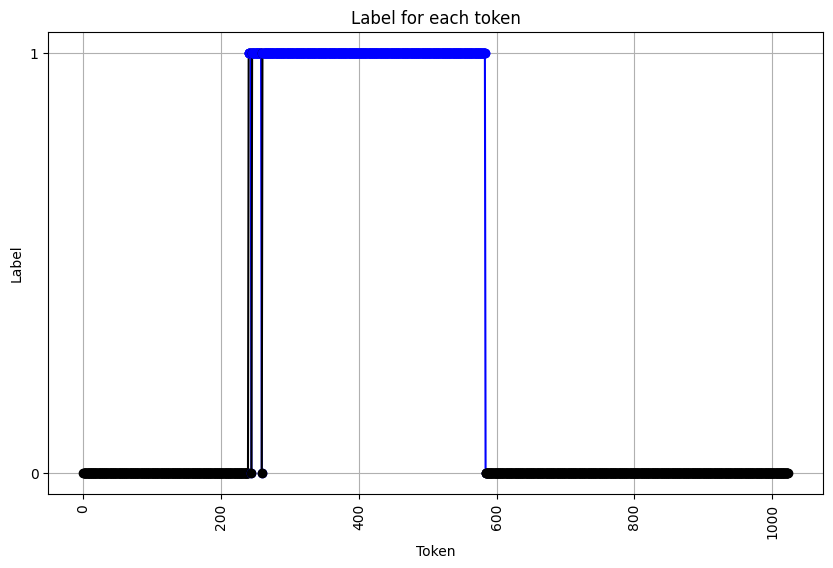

 10%|██████████████▊                                                                                                                                         | 4/41 [00:02<00:28,  1.28it/s]

MALYREGKAAMAADGTVTGTGTKWQSSLSLIRPGATIMFLSSPIQMAVVNKVVSDTEIKAITTKGAVVASSDYAILLSDSLTVDGLAQDVAETLRYYQSQETVIADAVEFFKNFDFDSLQNLANQIKEDSEAADASAAAASASESAAKTSEINAKASEMAAETARDQVQNIIDNAGDQSTLAVLAQSSGLKNIGQCANLTALRSLQFSFVGQQVFLKEHTTGQNSGGGIWYCHSMTSDSSYVDDNGCQIINNYGQVIRRKDVKELTSSYFGLRAGDTIDPVLTNMYKASRTFNIYEAKIENPGFDKGYVLHGGLRFYCGDKPFYILSYSVGTLRGPNLWHTGNNVGITFSRFKEDGTSQQAWSGGGINGFRFWGAASYLVEGNTGVDATPVRLSDMWDGDASNLWVTGYTGNTNGAVVSLYNEFAWTEGCTVKNVMARKSRRGVTFLRNHNGIATDSFFRTVVDLSFNAGVPGQATQVMVVGDGTPAGACLVYGHDIKLTQWMSAGSWHDIVRLEDHSIIAETGVIKIVADGYGISKSTVPATEVVHSINVRGLNARFRSRVENWSNQAGGWGLDFLNIIFQSSMYTNAMTFYESDFDALPTINPVGMKIRFNGTFTVEERQSGKVYTLNGLIPGMTLKVKLTSRNGNDLGDAVVQEWKVFVRSTNFPCIVVPMSGGANIATTDGLAVTNTSPVQTATFLKTVTPTQARNFIGQNYGLTVKNANDDNSLSYAVNSGRKIRFILPANPGATTTTPYSVEIEVL


cds21/+/1/2376


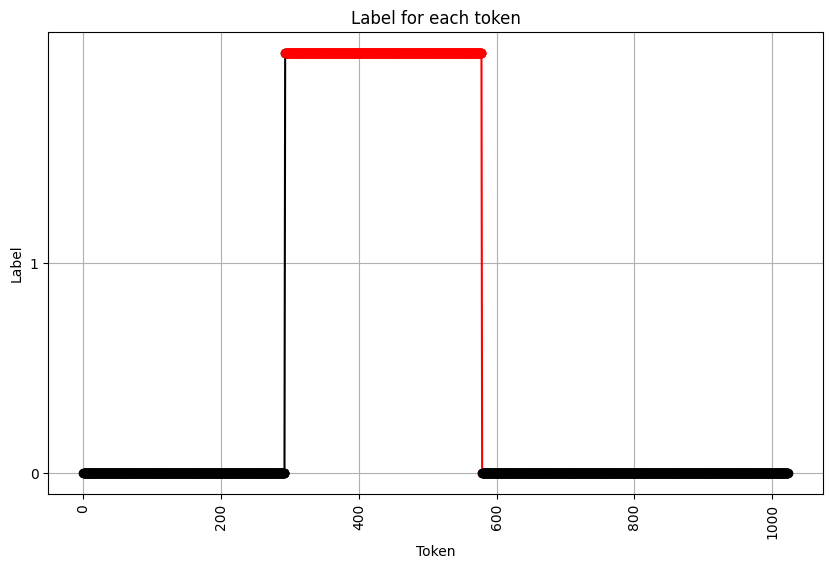

MALVSQSIKNLKGGISQQPEILRYPEQGSLQVNGWSSETEGLQKRPPMVFIKSLGGRGYLGEDPYIHLINRDEYEQYYAVFTGNDVRVFDLSGYEYQVRGDRSYVTVNNPKDNLRMVTVADYTFIVNRTRQVRESQNLTNGGTFRDNVDAIINVRGGQYGRKLEVNINGVWVSHQLPPGDNAKEDPPKVDAQAIAEALATLLRTAHPTWTFNVGTGYIHCVAPANTTIDILETKDGYADQLINPVTHYVQSFSKLPLNAPDGYMVKIVGDTSKTADQYYVKYDKGQKVWKETVGWNISIGLDYTTMPWTLVRAADGNFDLGYHDWKDRRAGDEDTNPQPSFVNSTITDVFFFRNRLGFISGENIVMSRTSKYFEFYPPSVANYTDDDPLDVAVSHNRVSVLKYAVSFAEELLLWSDEAQFVLSANGVLSAKTAQLDLTTQFDVSDRARPYGIGRNIYYASPRSSFTSIMRYYAVQDVSSVKNAEDMTAHVPNYIPNGVYSINGSGTENFACVLTKGAPSKVFIYKFLYMDENIRQQSWSHWDFGDGVEVMAANCINSTMYMLMRNAYNVWIAAVDFKKDSTDFPFEPYRFHVDAKRSYHISETAYDIETNQTIVNIKDIYGASFYNGTVAICESDGKITEYEPTGSSWDSTPDIRISGDISGKDIVIGFLYDFQYVFSQFLIKQEQNDGTTSTEDSGRLQLRRAWVNYQDTGAFTVSVDNGSREFNYLVNARVGSTGLRLGQKATTTGQYRFPVTGNALYQKVSLSSFNASPVSIIGCGWEGNYMRRANGI


cds26/+/1/3732


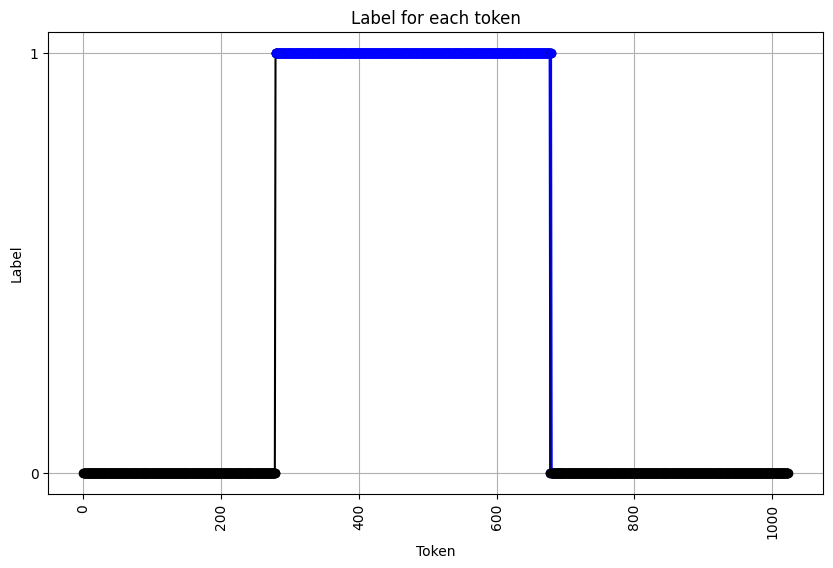

 17%|█████████████████████████▉                                                                                                                              | 7/41 [00:06<00:28,  1.19it/s]

MMNQDVKTVIQYPVGATEFDIPFDYLSRKFVRVSLVADDNRRLLSNITEYRYVSKTRVKLLVETTGFDRVEIRRFTSASERVVDFSDGSVLRAADLNVSQIQSAHIAEEARDGQYYSLNLNDLGQFDAKGTKIINLGAPTSPQDATTKLYVDTNDAALSQRILDEIKARAEGDIEMLRQAKMYSDSQIPGVLPDGATSVGYWLPSATALMNDDSGHPVVRVRGFYTADDGGEGSWVWTNEVDAQKAGTHDILTASVYDKVGRRYRIDITIGAVNAAQNGARRLTYAQATDRTTDDFVCLGQVISGITSLMPLPVSTNNSESGYIGDYRINLTISPGRYRIGKESGGIDSGMVINAWGARVHVVAGKSYTRAITGKWIHGLVHGYDQIKRKWEAVGKQAFWGSVSLKDVVINGGFWIGDHDLRTPASECSAGVGTLLLNPEGVIMNGVHQRNFNWVHVAMGAMIEETWYRTSKGRLFDDNELDYPYVMDFMTSNVPPVTRRFGNFNRVAYHGCKFESGRRGVFRNGVDWSGCYNTEIINNIAWRNPANADGSLPEFIAVLTGTAFHMSAGYMGPAAAKDFNAGVASVYSSTQNIKFDATYTEWTYAFMMISSWGFVDSASRLQGLSLDLVSVYKDNFADYGQIIFEEGCFPTMSEDGSATYPAGFKHFDTPQGQSPYVIGKPVRDVGAFRNQGFDFKYATNNVYLTTGTDWESWRDRPYAREMFNAFGLQINSGTAFLPLQNPADKSMTCIWYKDFTGNFDTRKVIQFITAAAQEGPNADEALYKSYAERVVDFGNGYKMMMIPNKRLTAWDGIYTYARNASITVEVSADTPIALIAVEAYTGGVPLFPNGVPNYVPESSCASVVPTAPQVGFDSNLGGGLFFDGDVVGPWVHVRRNKVGRRITPQVTAGSVLSTRRVSGQGVTLESALKTTFTATIVSSNADTTTISIPSASLPSVAVGIPLYVQSGSSTGFTGLAHLHLRVMLANGKADNKYVVNGKLG

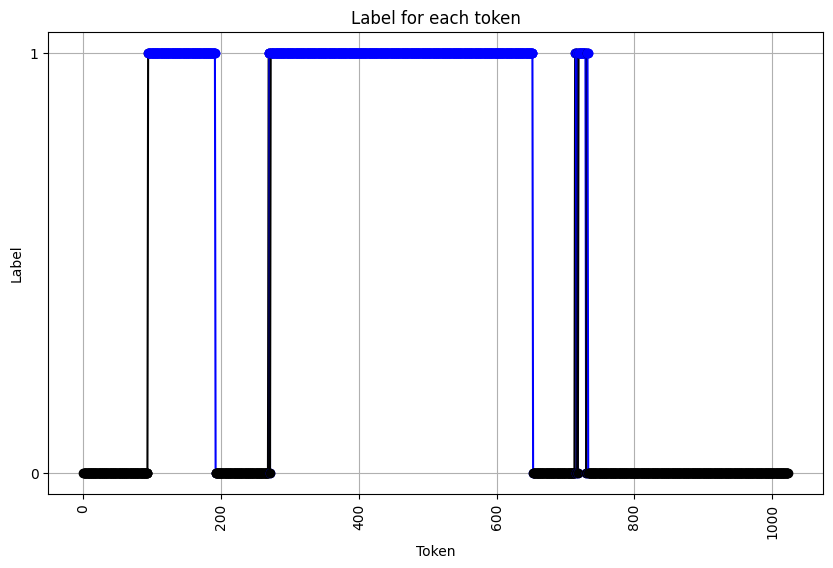

 20%|█████████████████████████████▋                                                                                                                          | 8/41 [00:07<00:33,  1.00s/it]

MNKMFTQPTGPVAKQTNKQAIARVLGIKQNQVVYLSSGQDLTSFLVAYDKATESVYRIPSTVSGKVISYAINNYVCTVTTDSGQYTLLPVLGKDIAYLTFDMFGVPNDGLTDATAGIKTVAALAKLMKLPVKQNTGVYLISGSDAIEFTNDTDLSGITLLPTASYTGYLLFTQPDSVTVYDSASSVVAAVNSQPLLANSSRLGGLVNNTVLNGKSLFMYGSDPLYVSRGTTKYWWSASRLSSKGRLDTPLKYSVASVTQITTLTIAKKETVVKLPNWDFGNGPANLGVMRFTNITRYKVYGGSVFNRPLSDVNKQPVIISINYAYGCKFEGFYDAYPSFPSVNGSIAYAYTLNHNYTDCCTFKNFNSQGDGWGVVGGQLANNITYINCNLNRVDMHDPFMGYMKLIDCDLGYWGICASGMGDLYLERCTVNLEDFIMNGYREHDGIISTRGDFGGFFDGNVYIRDLKIIGDATAFRTKNNRGVSLFSSYSFNATTGYIPAGSPIEPWGFKEIYIDGLHCDTPIVGKRFSSIVYAASVQYTTYFPRVIQIKNADFNSSEPECFDMHGFLVSPDNAAKTGIAHTLNFKPTNFIQMDDCSLGGIEIQRPYSTYDYNNVSFRGSNLKQANSRNSPIEFYTDQIGRYEFVNCDLKKISDSTKSTGSTSSRQSVFSVNGGVYNSLTDSPFDIKYQTGLRTVILCSNVNFVGPYSQTTVVDANLNVAEFATLDNCKFYSNITLAYVAPALWLGSTSNSATAFNVARGNTLNTVISNSNTNAGGGVITGITTKVDKVPNGVSNGHIGGVYYVDAIGQNGSYQLYLNARDTKAQVGKIVSNGTISGIFLQ


cds32/+/1/2289


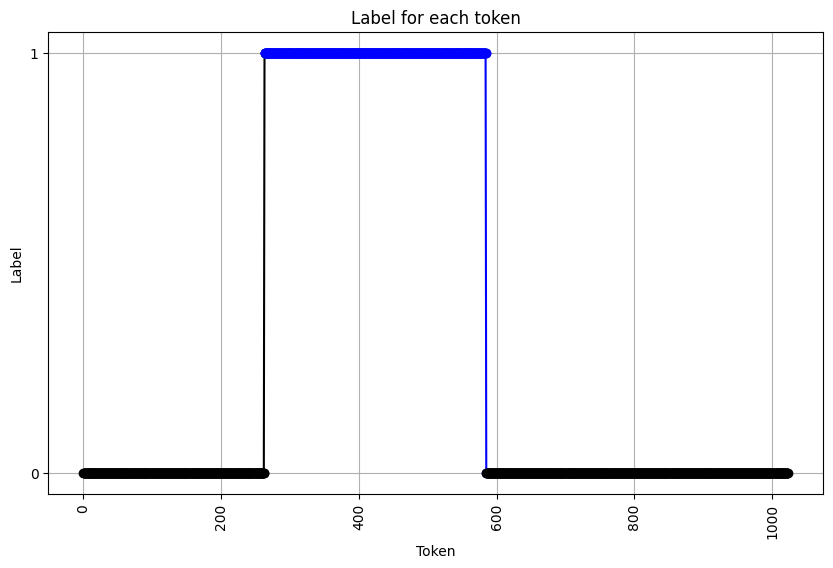

 24%|████████████████████████████████████▊                                                                                                                  | 10/41 [00:09<00:26,  1.15it/s]

MALYREGKAAMAADGTVTGTGTKWQSSLSLIRPGATIMFLSSPIQMAVVNKVVSDTEIKAITTKGAVVASSDYAILLSDSLTVDGLAQDVAETLRYYQSQETVIADAVDFFKTFDFESLQNLANQVKADSQSAGTSAAAAAASETAAKTSEINAKASEVAAETARDQVQHIIDNAGDQSTLAVLAQSSGLKNIGQCANLTALRSLQFSSVGQQVFLKEHTTGQNAGGGIWYCHSMTSDSSYVDDNGCQIINDYGQVIRRKDVKELTSSYFGLRAGDTIDHVLTNMYKASRTFNIYEAKIENPGFDKGYVLQGGLRFYCGDKPFYILSYSLGTLRGPNLWHTGDNIGITFSRFKTDGTSEQAWSGGGIRGFRFWGAASYLVQGNEGVNATPVRLSDMWQGEACDFWVTGYTGNTNGAVVSLYNEFAWTEGSIVENIMVRQSIRGLTFLRNPGTTATDSFFRIVADMSFNAGVSGKSTQVMVVGDGTPAGACLVYGHDIKLTQWMSAGSWHDIVRLEDHSIIAETGVIKIVADGYGISKSTVPATEVVHSINVRGLNARFRSRVENWSNQAGGWGLDFLNIIFQSSMYTNAMTFYESDFDALPTINPVGMKIRFNGTFTVDERQSGKVYTLNGLIPGMTLKVKLTSRNGNDLGDAVVQEWKVFVRSTNFPCIVVPMSGGANIATTDGLAVTNTSPVQTATFLKTVTSTQARNFIGQNYGLTVKNANDDNSLSYAVNSGRKIRFILPANPGATTTTPYSVEIEVL


cds40/-/1/1983


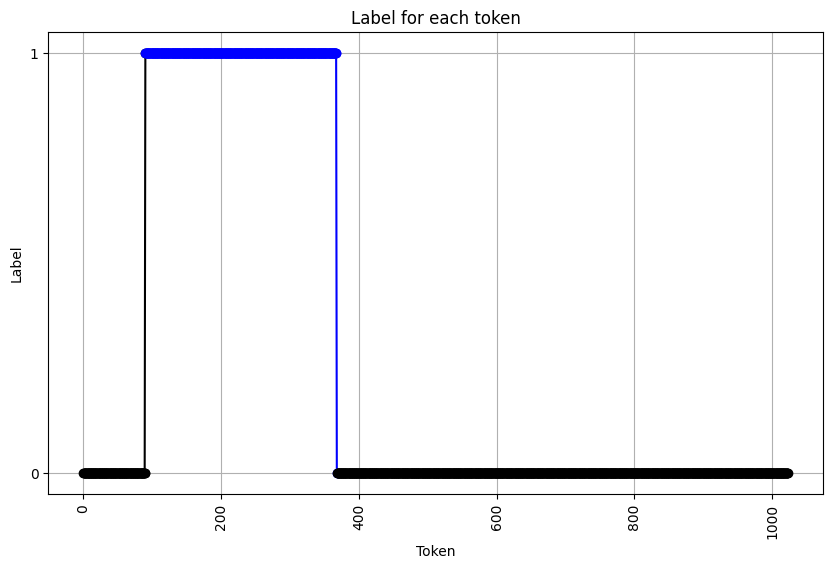

MALVNLVTVNPRDLTHVQSYDELKVTVPKAAGERVVLLQYAEGLAPTYTQYIAKTKDGSIDNGGTVCVPTTGSFQWVLVTESGEVGPNHPEAVRPEWFGADPTGQVNSAPAFKRTFAAYSKAILSGGTYLYSDLTPIDKGSFTILGQGSTINFVDGAQFFICTGTIGRIWVEHLYLKGGKSFFDFRAATANSFNDVRGFYDLNMSDYTEVAIRYTDRDCPWWSVDKCMFSARTNDGTIGLWDNGSDNNVVRDCKFYKNQYHISAKPGSGTYKIETCDFGQFFTTGDGVNRANIWVRVPTTSPTPTGVTGMFLVRDNKFGNENERSSDVKLLLANESSGMPVYDSYSGALPAVHFVFGGNYSTGYGNYPAHWMRSVGGWLPQTFTFEGDNIQYADISKGKYFCYMDNVTRTTPYKILFNRKAARDSQLLWRGAVSNDPLVTFTLTDPSTAILAGDPLVHSPYSAGVGSGTIDITKNKMPSVSYAGVGMTITASTDFLGRAEAVRGNYSRRYNNIFQPLETVTAYQPGFIQGEAKLADDAAFDSAVYLIDYAQDTEDQVVYNQFPVQLRKGVWTSYCFPVMFMANKTNHCLVFKPNTQDTTSYPNSVVWSRSRAYLGKTPGLVGVQRLGSLILNEVPTAATGLPIGSVWMDATAGNALKIVT


cds52/-/1/2382


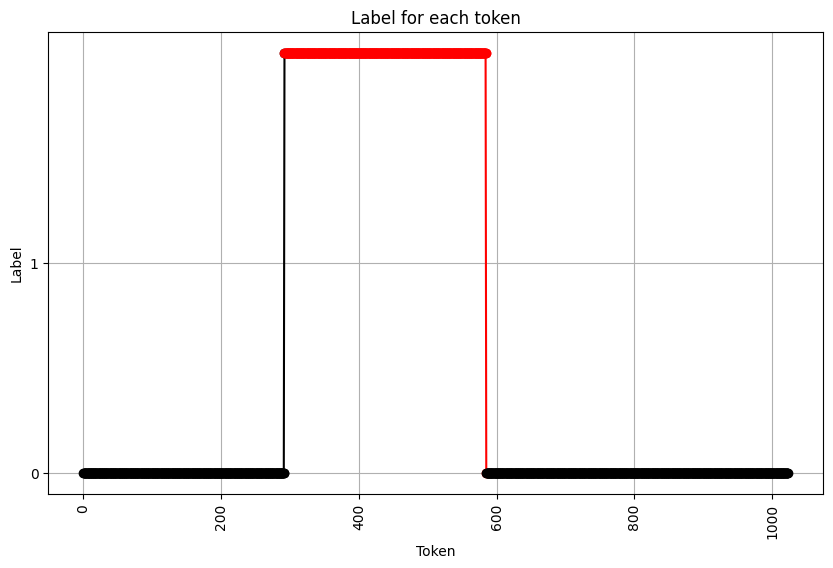

 27%|████████████████████████████████████████▌                                                                                                              | 11/41 [00:11<00:41,  1.39s/it]

MAQSLEGTIQSLLQGVSQQVPRERQPGQLGAQLNMLSDPVSGIRRRPPGEVVWESTIDNPGLDSLFTEYVERGTDGRHLLINTSNGNWWLLAKNGKTIINSGNDPYFVTTAGQTSLQTASIAGLTYILNTEMAPVTTVDNTGRIDPSTTGFFYVKAAAFQKRWEVTVTWSGGSVTGYYNVPDASSGTESAEWASASFVVNALINGDPNGYGIGAAITAAGGTVVGFGAYMYIAGLPNLVVSTSSGDTYAVASGQSRVPQEQDLPAQLPAEADGAMCRVGTASSETAWYQFNYSERTWYEVGAYGSITKIMNMPRELAADDNIIARDWEGRLAGNDDNNSDPGFVENGYITGIAAFQGRLVLLSGSSVDMSASGLYQRFYRSTVTSLLDTDRISISSASAQDSVYRTAVQFNRDLVLFANSMQAVVPGSAVLTPTNASISITSTYDCDSRVTPVMAGQTVIYPNKRNDNYAGILELIPSPYTAAQYTTQDATVHLPRYIPGRVLQMQNSSVTNMAFSRMSGERNSLLVYEFMWGGSDGAKMQAAWHKWSFPYPILSVQALEDEVFLYMQGPSPSNKLLIVSMDPREGYQLGSEYREAYSDLQKQVQVQDGVFTVPSVLRPVGWADNYKEELILTYLPSNPMGPTEVGIKEIAGENTLRVVRGVPDGTYVIGRRYRSTFTLTTPILRDQNDKLVGSGHVRLLRLDVAVRNSGHFDVQVLDTPRDVNWGGELTGILMNSKELTLGQALRMDLATITVPCRTNADTTEVSLFTEGSMELNVLDISYILRYNQRRRRI


cds42/-/1/1080


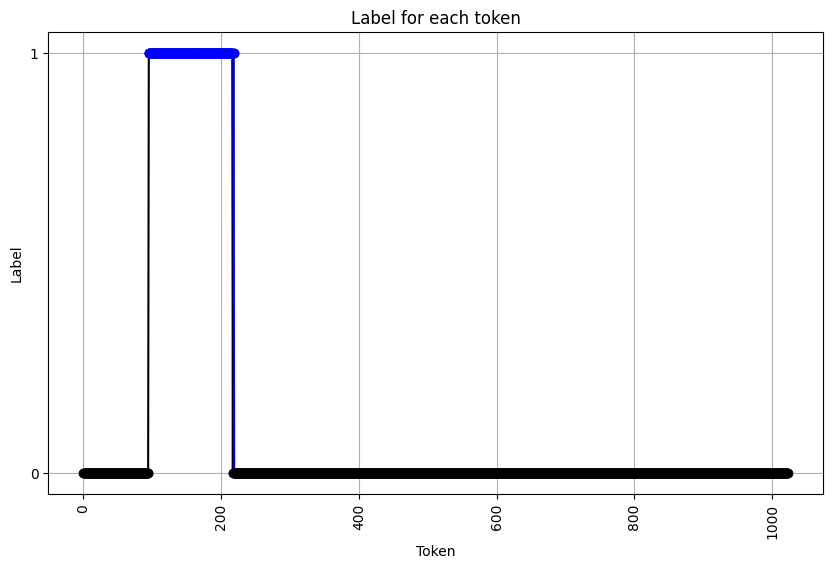

 29%|████████████████████████████████████████████▏                                                                                                          | 12/41 [00:12<00:36,  1.26s/it]

MATILIKDRLRQSVEAASGGLQTIVYTKKGQPCFMNVLAKFDLSEIDSSLSGTHPAFIVDDKEFSQILIGTYQMRVIDGEMVSQPYSVPTRGVVSLPYAIQTARASGPGFHAITNAEWSALQCLAWKNQQYPKGANLNGCDVTDTSLYGIRVDGLPAGTTTGSGLIYTGSGPTDFRHNLAYNGISDLNGNANEHVSGLRCVYGELQVLANNNAASSSRDLLDRSADWRAISGEDGSLISPDGNGTTANSIKLKSGSVASAADYTLTLTSGRFQTATIVNSTGKAVTSLALKKLQILGLYPFLSTDSDFFIINTSVIGYAQRGGHNSNAADAGINALALSNLNINMGGNITSRLAYYPVA


cds42/-/1/1080


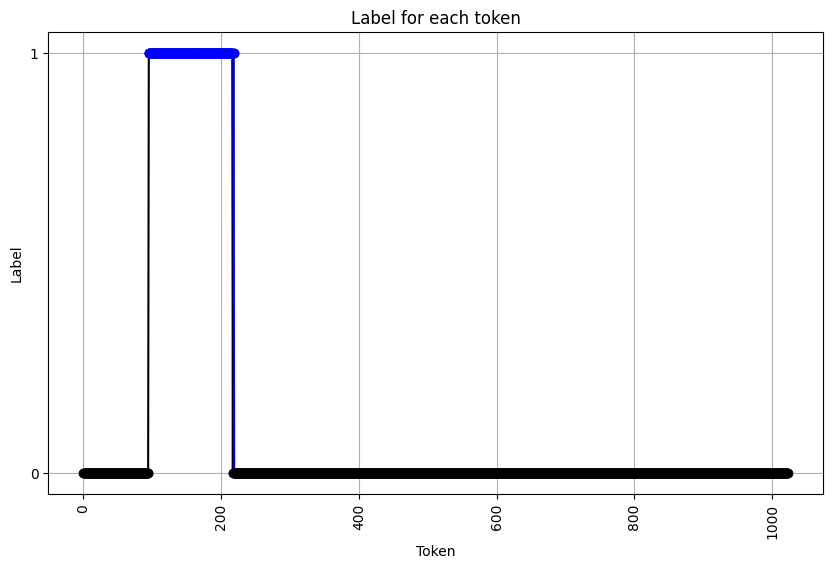

 32%|███████████████████████████████████████████████▉                                                                                                       | 13/41 [00:14<00:34,  1.22s/it]

MATILIKDRLRQSVEAASGGLQTIVYTKKGQPCFMNVLAKFDLSEIDSSLSGTHPAFIVDDKEFSQILIGTYQMRVIDGEMVSQPYSVPTRGVVSLPYAIQTARASGPGFHAITNAEWSALQCLAWKNQQYPKGANLNGCDVTDTSLYGIRVDGLPAGTTTGSGLIYTGSGPTDFRHNLAYNGISDLNGNANEHVSGLRCVYGELQVLANNNAASSSRDLLDRSADWRAISGEDGSLISPDGNGTTANSIKLKSGSVASAADYTLTLTSGRFQTATIVNSTGKAVTSLALKKLQILGLYPFLSTDSDFFIINTSVIGYAQRGGHNSNAADAGINALALSNLNINMGGNITSRLAYYPVA


cds21/+/1/1080


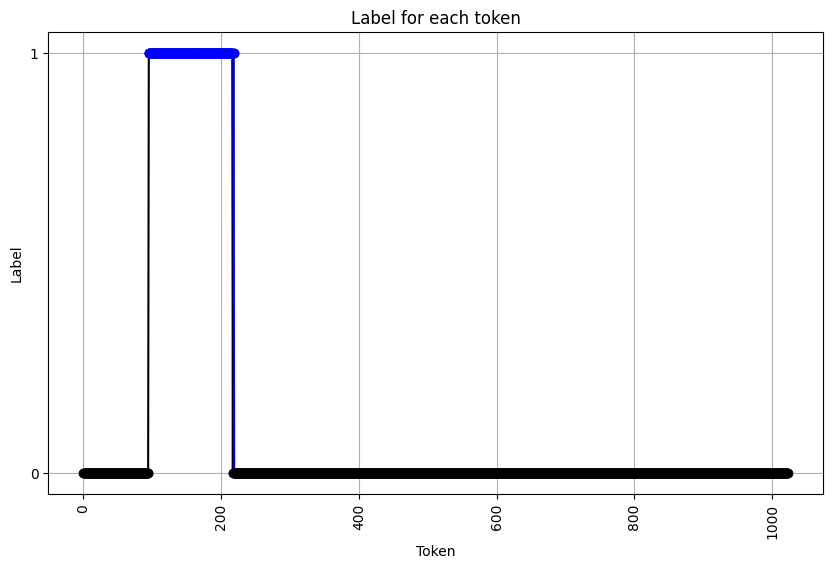

 34%|███████████████████████████████████████████████████▌                                                                                                   | 14/41 [00:14<00:30,  1.13s/it]

MATILIKDRLRQSVEAASGGLQTIVYTKKGQPCFMNVLAKFDLSEIDSSLSGTHPAFIVDDKEFSQILIGTYQMRVIDGEMVSQPYSVPTRGVVSLPYAIQTARASGPGFHAITNAEWSALQCLAWKNQQYPKGANLNGCDVTDTSLYGIRVDGLPAGTTTGSGLIYTGSGPTDFRHNLAYNGISDLNGNANEHVSGLRCVYGELQVLANNNAASSSRDLLDRSADWRAISGEDGSLISPDGNGTTANSIKLKSGSVASAADYTLTLTSGRFQTATIVNSTGKAVTSLALKKLQILGLYPFLSTDSDFFIINTSVIGYAQRGGHNSNAADAGINALALSNLNINMGGNITSRLAYYPVA


cds40/-/1/4056


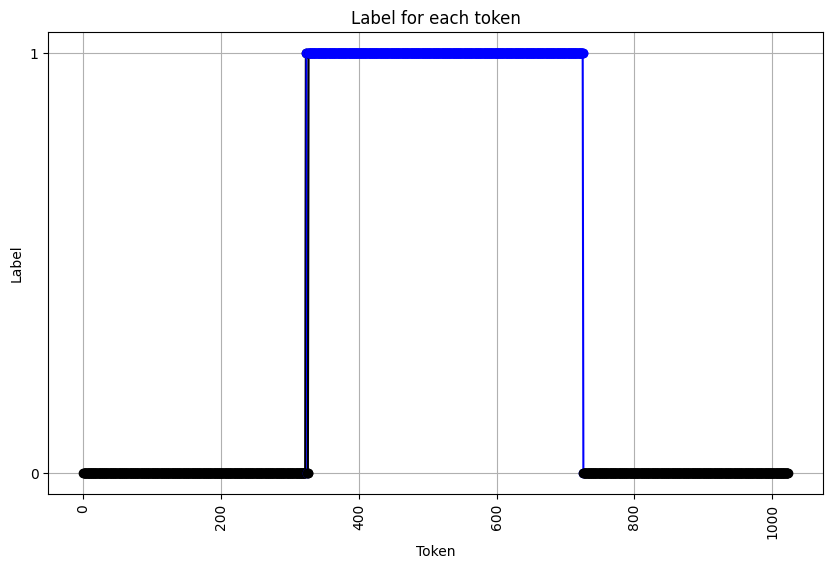

 44%|██████████████████████████████████████████████████████████████████▎                                                                                    | 18/41 [00:17<00:17,  1.35it/s]

MSTISGILKNGLGEVLPNVVLELIALKTSSSVIVTSDGRFKTDYLGSYSIEVLPGSYQLYVSFGSSGPRAVGVINVYSDSIDGTLEDYLTVPGESEVTPEILSQIIQARNDAVNAAQSAADDTTAIVYQQLADQQTAWDYQFHQQAQMFTTAMLEQKNAWDDQMEDQKDEFIDLLTSSGYSWLNDYINGPVTFFNRSQVTVYDGVAYRLAASTPIGFTTTGTDAASWANDKDKLVAIGDNDIRQQVQYQLGKWLPSAAALMLSEEDASAIYVRGFYGVNDGGAGTWLATGATIAANAGKHIPSTAKIYNKNGVEYSLDISSGVINALANGLKQYTYAQCKDDSTDNYVCAAEVHNGIISLLPPAVYTSNNEGSYTGGKRLKINFPPVRTRFGKTYFKKASGVCVNGNNVRLILCAGPSTKFSTTGVRIDGFSHGYNEIKEKWDAVNSNLYWGSLSLQDYKLRDIIMIGDHDITKTASACTGGVGNLSLNPEGEIVSGVYIKDFNWVRVAMPSLVETTYFNQLGHAFDNNTLDYKYITDFMVNSSGAPTRAGNFNRVKEDNCKYESGRRGVYRNACDWTTLTNCEIINRRAWRQSGNVDGTIPEYIAVCTGTAMHVAGGYWGPAAAKDYNGRLGTVYGTAQNHIFSGVYTEWTYNFYTVSRWGFNGKASRLFSLHLDCVSSYKDDARNYCMLRFEGGCFPTTDDGGSSVYPDGFYHYDTPNGLSGLSFNSPVRDWGAFHHGGYDNKYGPYNWFVGAGTDWDSWRDRPYAKEMFNPYGFAINAGPAMALWANPSIKSEIGIWIKDPSGNFDPQRVYAWTTAAGQESSANTDTALYKAQAELWVDFNNGYKLLKITNKRLTAWDGLFSYQRNCGIYFDVPADGSTPIVVKAIEAYTGGIPVFPNGCGNYTPESAATSVLSTATNMVGAGFSVGGGLFSPGDIVGPWVHVRRTQSGFTISPTLTPGYTLDRKMVTGGCTLEAAFKVAFSATVETVNSNGTTIIT

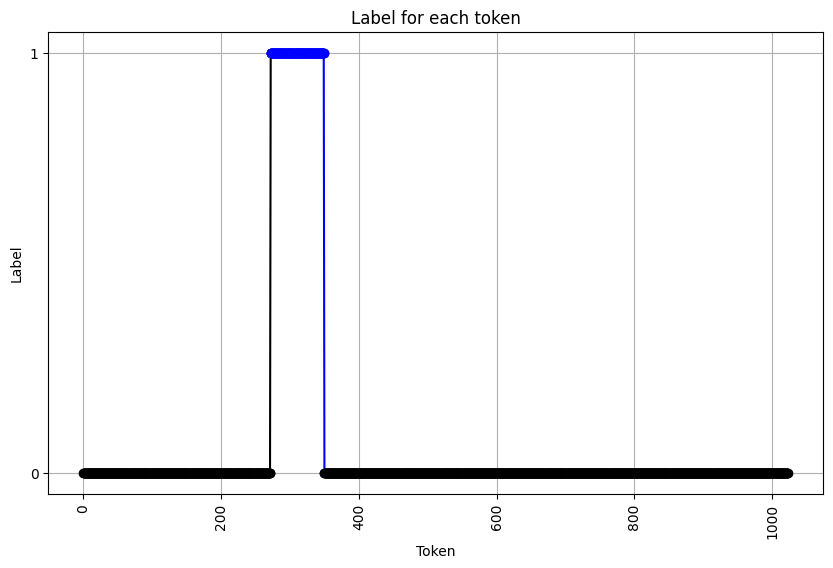

MDQDTKTIIQYPTGSDEYDIPFDYLSRKFVRVSLVSDTQRLLLDNITDYRYVSRTRVKLLVSTDGYSRVEIRRFTSASEMVVDFSDGSVLRATDLNVSALQSAHIAEEARDLFSTSLSIGQLSYFDAKGLQIKNVAQGVDNTDAATVQQLNKIIADVVTTIPDSVADNIRGLWARVLGDIGITLVDGSFESGATITTRTQALWSISGRKCYTWAGSLPKVVPENSTPESTGGISETAWVDSSSKALGVLLAGPSGAERVGLKQGGTVQDAINWLTFDSFDIVKDGSQDVTADIMAACVVANDLGLDIKQNDGTYLVSGNPVWPVYNSLDLNGVTLKLAAGFSGYFALTQKDSTTVYGPTSPIVQAINAAGGRTAGSGVLEGLVNSTELNGKFLFMEGADVLYYSRGTAKYWWANTYLSNRGKLSDNLKYGVSAITKITAVTPRTKIVYYRLPNLDFGNGPANNGVIRVLNNTRFIMQGGSISNRPLKDVSKSPVIISLNYCASFKAYDFFDPYPAFAVNANDSLAYSYTLNFNDIADAVFENFNSQGYGWGVVGGQRSTNITYRDCNLNRVDMHDPYMGYLKVLDTRLGTWGINASGMGDMYLERVTVDLDDSAHGGYREHEGIINARGDFGGFHDGGLYIKDLTIVGEASAFEAASGHPVALVSAYSFNASLAYIPESSPVTPWGFKEVIVEGLHCPFKRTGRRFNSIISAPSIQFTVYHPMRVKLEDCNFNSTAFEKFDLRGWRVTPYNPSKVGIANTLAFRPTNFVDVKDCSMVGLEFTRPTSAYDYSNFDVNLVNVKNVEEHSLSPFTLYTNQCGRYNLVGCGLQQIVDKSMTTGERANRRSTFSVTGGTWNSLSGNPTDITYGNGYDIPVVATGVMFVGPYSQTEVTDANLNVAEFVQASGCKFLSSGPTYIQPLLWSGAGGPTGASANFNVARGNTLGLNISAVNGETSQVIAATLMIPQGFSTGQASGTTYGFSVAKNINYQLGLNARSLKAN

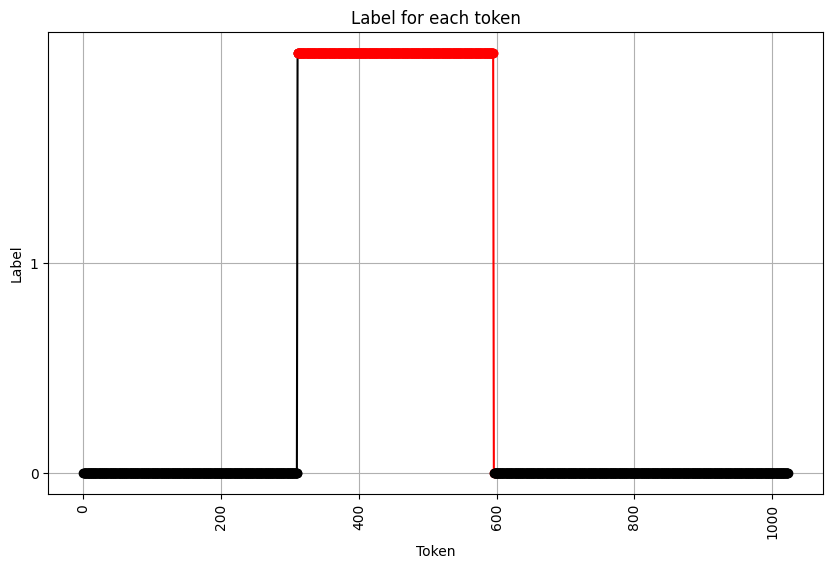

 46%|█████████████████████████████████████████████████████████████████████▉                                                                                 | 19/41 [00:21<00:31,  1.44s/it]

MRTYKVSSVVNQKLKEDQMALVSQSIKNLKGGISQQPEILRYPEQGTLQVNGWSSETEGLQKRPPMVFIKSLGGRGYLGEDPYIHLINRDEYEQYYAVFTGNDVRVFDLSGYEYQVRGDRSYVTVNNPKDNLRMVTVADYTFIVNRTRQVRESQNLTNGGTFRDNVDALINVRGGQYGRKLEVNINGVWVSHQLPPGDNAKEDPPKVDAQAIAEALAVLLRTAHPTWTFDVGTGYIHCVAPANTTLDVFETKDGYADQLINPVTHYVQSFSKLPLNAPDGYMVKIVGDTSKTADQYYVKYDKGQKVWKETVGWNISIGLEYHTMPWTLVRAADGNFDLNYHSWADRRAGDDDTNPQPSFINSTITDVFFFRNRLGFISGENIVMSRTSKYFEFYPPSVANYTDDDPLDVAVSHNRVSVLKYAVSFAEELLLWSDEAQFVLSANGVLSAKTAQLDLTTQFDVSDRARPYGIGRNVYYASPRSSFTSIMRYYAVQDVSSVKNAEDMTAHVPNYIPNGVFSINGSGTENFACVLTKGAPSKVFIYKFLYMDENIRQQSWSHWDFGEDVEVMAASCINSTMYMLMRNGYNVWIAAVDFKKESTDFPFEPYRFHVDSKRSYHISETAYDIETNQTVVNVKDIYNASFDKGTVAICESDGKITEYEPTGDSWDSTPDIRISGDVSGKDIVIGFLYDFRYVFSRFLIKQEQNDGTTSTEDAGRLQLRRAWVNYQNTGAFTVSVDNGSREFNYLVNARVGSTGLRLGQKATTTGQYRFPVTGNALYQKVSLSSFNASPVSIIGCGWEGNYMRRASGI


cds33/+/1/2376


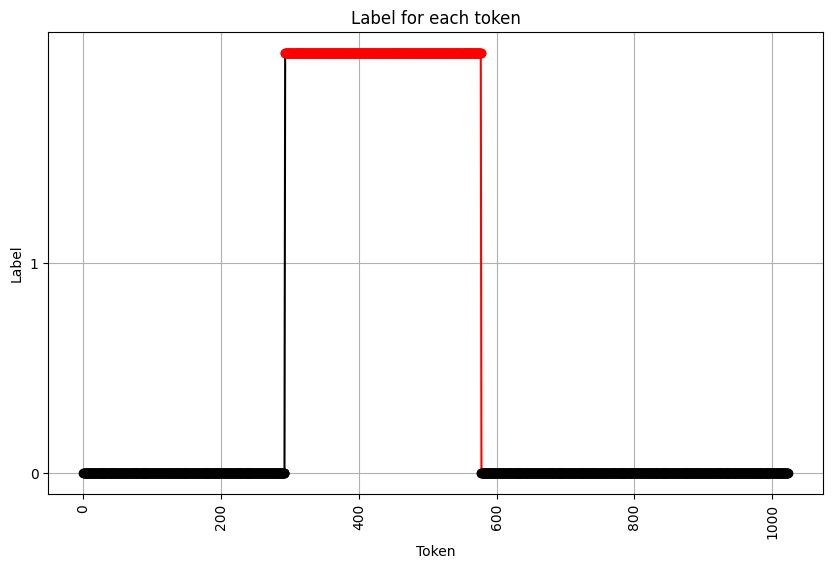

MALVSQSIKNLKGGISQQPEILRYPEQGTLQVNGWSSETEGLQKRPPMVFIKSLGGRGYLGEDPYIHLINRDEYEQYYAVFTGNDVRVFDLSGYEYQVRGDRSYVTVNNPKDNLRMVTVADYTFIVNRTRQVRESQNLTNGGTFRDNVDALINVRGGQYGRKLEVNINGVWVSHQLPPGDNAKEDPPKVDAQAIAEALAVLLRTAHPTWTFDVGTGYIHCVAPANTTLDVFETKDGYADQLINPVTHYVQSFSKLPLNAPDGYMVKIVGDTSKTADQYYVKYDKSQKVWKETVGWNISIGLEYHTMPWTLVRAADGNFDLNYHSWADRRAGDDDTNPQPSFINSTITDVFFFRNRLGFISGENIVMSRTSKYFEFYPPSVANYTDDDPLDVAVSHNRVSVLKYAVSFAEELLLWSDEAQFVLSANGVLSAKTAQLDLTTQFDVSDRARPYGIGRNVYYASPRSSFTSIMRYYAVQDVSSVKNAEDMTAHVPNYIPNGVFSINGSGTENFACVLTKGAPSKVFIYKFLYMDEDIRQQSWSHWDFGEDVEVMAASCINSTMYMIMRNGHNVWIAAVDFKKESTDFPFEPYRFHVDSKRSYHISETAYDIETNQTVVNVKDIYNASFDKGTVAICESDGKITEYEPTGDSWDSTPDIRISGDVSGQDIVIGFLYDFRYVFSRFLIKQEQNDGTTSTEDAGRLQLRRAWVNYQDTGAFTVSVDNGSREFNYLVNARVGSTGLRLGQKATTTGQYRFPVTGNALYQKVSLSSFNASPVSIIGCGWEGNYMRRANGI


cds38/+/1/3054


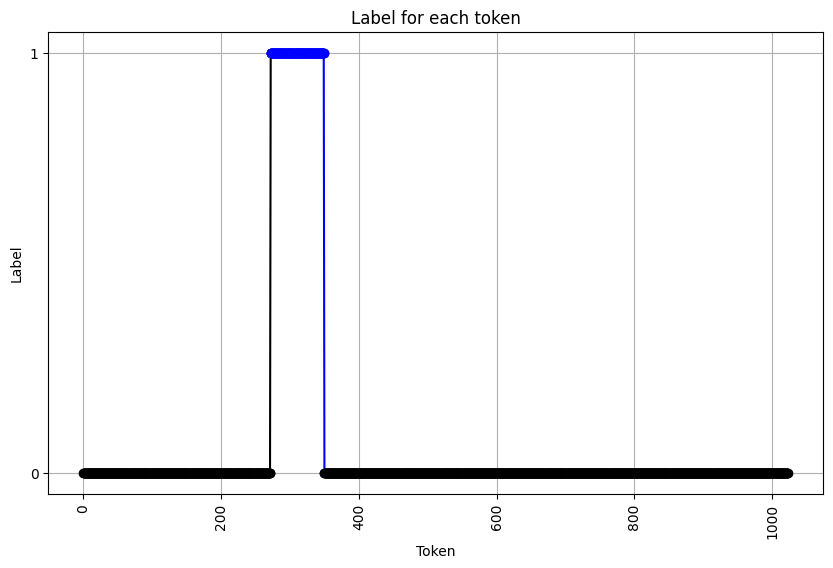

 49%|█████████████████████████████████████████████████████████████████████████▋                                                                             | 20/41 [00:25<00:45,  2.16s/it]

MDQDTKTIIQYPTGSDEYDIPFDYLSRKFVRVSLVSDTQRLLLDNITDYRYVSRTRVKLLVSTDGYSRVEIRRFTSASEMVVDFSDGSVLRATDLNVSALQSAHIAEEARDLFSTSLSIGQLSYFDAKGLQIKNVAQGVDNTDAATVQQLNKIIADVVTTIPDSVADNIRGLWARVLGDIGITLVDGSFESGATITTRTQALWSISGRKCYTWAGALPKVVPENSTPESTGGISETAWVDSSSKALGVLLAGPSGAERVGLKQGGTVQDAINWLTFDSFDIVKDGSQDVTADIMAACVVANDLGLDIKQNDGTYLVSGNPVWPVYNSLDLNGVTLKLAAGFSGYFALTQKDSTTVYGPTSPIVQAINAAGGRTAGSGVLEGLVNSTELNGKFLFMEGADVLYYSRGTAKYWWANTYLSNRGKLSDNLKYGVSAITKITAVTPRTKIVYYRLPNLDFGNGPANNGVIRVLNNTRFIMQGGSISNRPLKDVSKSPVIISLNYCASFKAYDFFDPYPAFAVNANDSLVYSYTLNFNDIADAVFENFNSQGYGWGVVGGQRSTNITYRDCNLNRVDMHDPYMGYLKVLDTRLGTWGINASGMGDMYLERVTVDLDDSAHGGYREHEGIINARGDFGGFHDGGLYIKDLTIVGEASAFEAASGHPVALVSAYSFNASLAYIPESSPVTPWGFKEVIVDGLHCPFKRTGRRFDSIISAPSIQFTVYHPMRVKLEDCNFNSTAFEKFDLRGWRVTPYNPSKVGIANTLAFRPTNFVDVKDCSMVGLEFTRPTSAYDYSNFDVNLVNVKNVEEHSLSPFTLYTNQCGRYNLVGCGLQQIVDKSMTTGERANRRSTFSVTGGTWNSLSGNPTDITYGNGYDIPVVATGVMFVGPYSQTEVTNANLNVAEFVQASGCKFLSSGPTYIQPLLWSGAGGPTGASANFNVARGNTLGLNISAVNGETSQVIAATLMIPQGFSTGQASGTTYGFSVEKNINYQLGLNARSLKAN

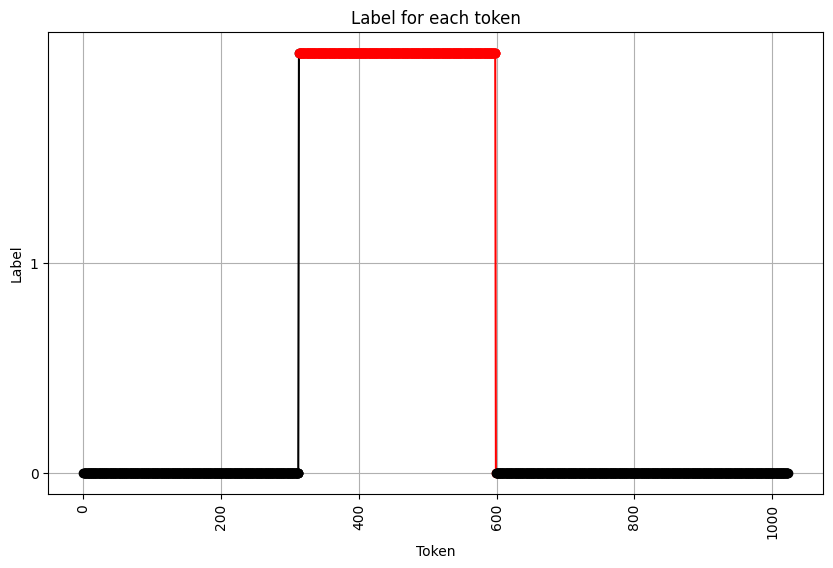

MAMRTYKVSSVVNSKSKEDQMALVSQSIKNLKGGISQQPEILRYPEQGSLQVNGWSSETEGLQKRPPMVFIKSLGGRGYLGEDPYIHLINRDEYEQYYAVFTGNDVRVFDLSGYEYQVRGDRSYVAVNNPKDNLRMVTVADYTFIVNRTRQVRESQNLTNGGTFRDNVDALINVRGGQYGRKLEVNINGVWVSHQLPPGDNAKEDPPKVDAQAIAEALATLLRTAHPTWTFNVGTGFIHCVAPANTTIDIFETKDGYADQLINPVTHYVQSFSKLPLNAPDGYMVKIVGDTSKTADQYYVKYDKSQKVWKETVGWNISIGLDYTTMPWTLVRAADGNFDLRYHDWKDRRAGDEDTNPQPSFVNSTITDVFFFRNRLGFISGENIVMSRTSKYFEFYPPSVANYTDDDPLDVAVSHNRVSVLKYAVSFAEELLLWSDEAQFVLSANGVLSAKTAQLDLTTQFDVSDRARPYGIGRNIYYASPRSSFTSIMRYYAVQDVSSVKNAEDMTAHVPNYIPNGVYSINGSGTENFACVLTKGAPSKVFIYKFLYMDEDIRQQSWSHWDFGDGVEVMAANCINSTMYMLMRNAYNVWIAAVDFKKSSTDFPFEPYRFHVDAKRSYHISETAYDIETNQTVVNVKDIYGSSFSKGTVAICESDGKITEYEPTGYSWDSTPDIRISGDISGNDIVIGFLYDFQYVFSRFLIKQEQNDGTTSTMDSGRLQLRRAWVNYQDTGAFTVSVDNGNREFNYLVNARVGSTGLRLGQKATTTGQYRFPVTGNALYQKVSLSSFNASPVSIIGCGWEGNYTNRASGI


cds37/+/1/3054


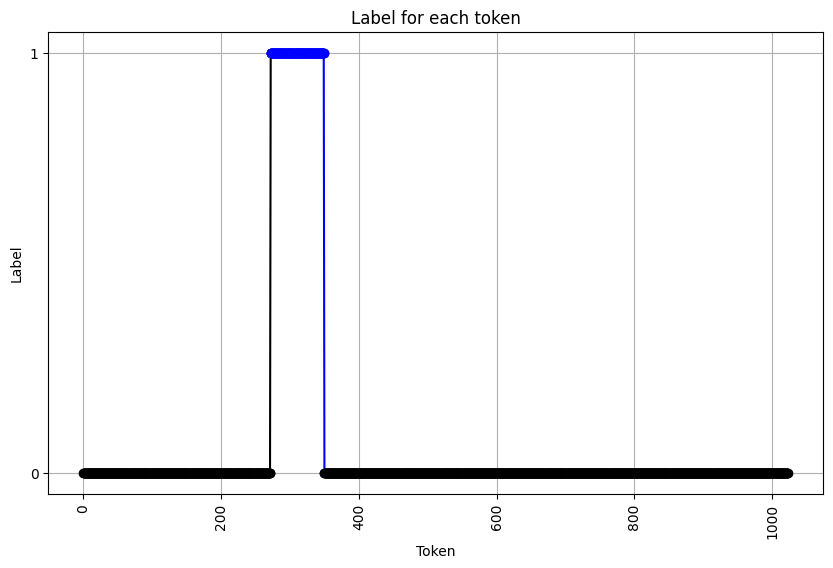

 51%|█████████████████████████████████████████████████████████████████████████████▎                                                                         | 21/41 [00:29<00:55,  2.80s/it]

MDQDTKTIIQYPTGSDEYDIPFDYLSRKFVRVSLVSDTQRLLLDNITDYRYVSRTRVKLLVSTDGYSRVEIRRFTSASEMVVDFSDGSVLRATDLNVSALQSAHIAEEARDLFSTSLSIGQLSYFDAKGLQIKNVAQGVDNTDAATVQQLNKIIADVVTTIPDSVADNIRGLWARVLGDIGITLVDGSFESGATITTRTQALWSISGRKCYTWAGALPKVVPENSTPESTGGISETAWVDSSSKALGVLLAGPSGADRVGLKQGGTVQDAINWLTFDSFDIVKDGSQDVTADIMAACVVANDLGLDIKQNDGTYLVSGNPVWPVYNSLDLNGVTLKLAAGFSGYFALTQKDSTTVYGPTSPIVQAINAAGGRTAGSGVLEGLVNSTELNGKFLFMEGADVLYYSRGTAKYWWTNTYLSNRGKLSDNLKYGVSAITKITAVTPRTKIVYYRLPNLDFGNGPANNGVIRVLNNTRFIMQGGSISNRPLKDVSKSPVIISLNYCASFKAYDFFDPYPAFAVNANDSLVYSYTLNFNDIADAVFENFNSQGYGWGVVGGQRSTNITYRDCNLNRVDMHDPYMGYLKVLDTRLGTWGINASGMGDMYLERVTVDLDDSAHGGYREHEGIINARGDFGGFHDGGLYIKDLTIVGEASAFEAASGHPVALVSAYSFNASLAYIPESSPVTPWGFKEVIVEGLHCPFKRTGRRFNSIISAPSIQFTVYHPMRVKLEDCNFNSTAFEKFDLRGWRVTPYNPSKVGIANTLAFRPTNFIDVKDCSMVGLEFTRPTSAYDYSNFDVNLVNVKNVEEHSLSPFTLYTNQCGRYNLVGCGLQQIVDKSMSSGERANRRSTFSVTGGTWNSLSGNPTDITYGNGYDIPVVATGVMFVGPYSQTEVTDANLNVAEFVQASGCKFLNAGPTYIQPLLWSGAGGPTGASANFNVARGNTLGLNISAVNGETSQTLAATLVIPQGFSTGPASGTTYGFSVAKNVNYQLGLNARSLKAN

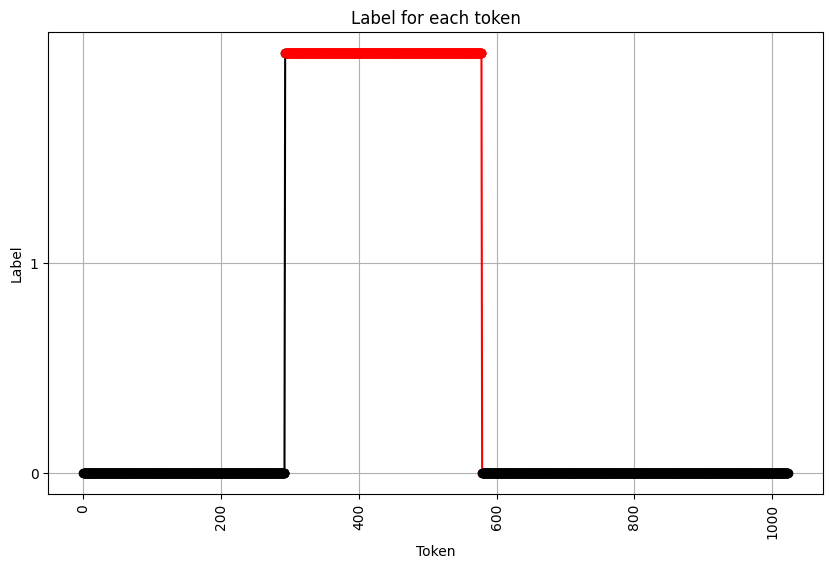

MALVSQSIKNLKGGISQQPEILRYPEQGSLQVNGWSSETEGLQKRPPMVFIKSLGGRGYLGEDPYIHLINRDEYEQYYAVFTGNDVRVFDLSGYEYQVRGDRSYVTVNNPKDNLRMVTVADYTFIVNRTRQVRESQNLTNGGTFRDNVDAIINVRGGQYGRKLEVNINGVWVSHQLPPGDNAKEDPPKVDAQAIAEALATLLRTAHPTWTFNVGTGYIHCVAPANTTIDILETKDGYADQLINPVTHYVQSFSKLPLNAPDGYMVKIVGDTSKTADQYYVKYDKGQKVWKETVGWNISIGLDYTTMPWTLVRAADGNFDLGYHDWKDRRAGDEDTNPQPSFVNSTITDVFFFRNRLGFISGENIVMSRTSKYFEFYPPSVANYTDDDPLDVAVSHNRVSVLKYAVSFAEELLLWSDEAQFVLSANGVLSAKTAQLDLTTQFDVSDRARPYGIGRNIYYASPRSSFTSIMRYYAVQDVSSVKNAEDMTAHVPNYIPNGVYSINGSGTENFACVLTKGAPSKVFIYKFLYMDENIRQQSWSHWDFGDGVEVMAANCINSTMYMLMRNAYNVWIAAVDFKKDSTDFPFEPYRFHVDAKRSYHISETAYDIETNQTIVNIKDIYGASFYNGTVAICESDGKITEYEPTGSSWDSTPDIRISGDISGKDIVIGFLYDFQYVFSQFLIKQEQNDGTTSTEDSGRLQLRRAWVNYQDTGAFTVSVDNGSREFNYLVNARVGSTGLRLGQKATTTGQYRFPVTGNALYQKVSLSSFNASPVSIIGCGWEGNYMRRANGI


cds26/+/1/3732


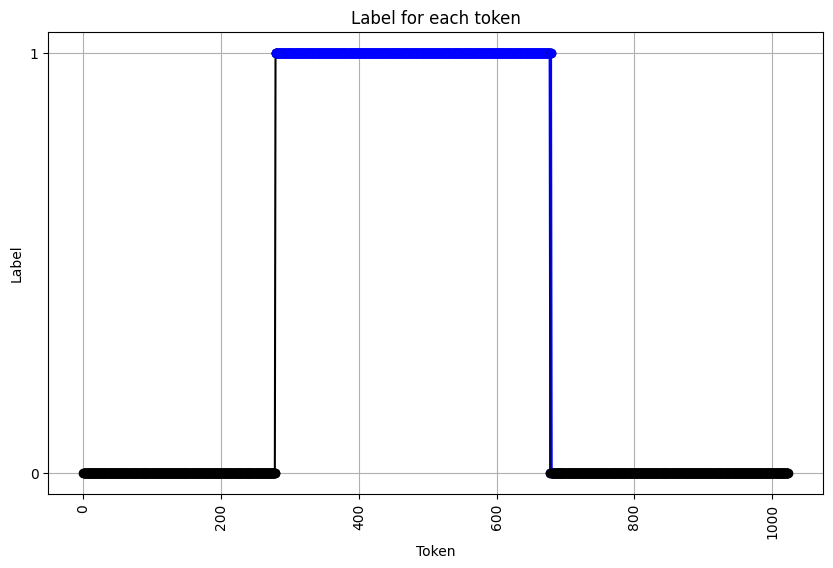

 54%|█████████████████████████████████████████████████████████████████████████████████                                                                      | 22/41 [00:34<01:00,  3.19s/it]

MMNQDVKTVIQYPVGATEFDIPFDYLSRKFVRVSLVADDNRRLLSNITEYRYVSKTRVKLLVETTGFDRVEIRRFTSASERVVDFSDGSVLRAADLNVSQIQSAHIAEEARDGQYYSLNLNDLGQFDAKGTKIINLGAPTSPQDATTKLYVDTNDAALSQRILDEIKARAEGDIEMLRQAKMYSDSQIPGVLPDGATSVGYWLPSATALMNDDSGHPVVRVRGFYTADDGGEGSWVWTNEVDAQKAGTHDILTASVYDKVGRRYRIDITIGAVNAAQNGARRLTYAQATDRTTDDFVCLGQVISGITSLMPLPVSTNNSESGYIGDYRINLTISPGRYRIGKESGGIDSGMVINAWGARVHVVAGKSYTRAITGKWIHGLVHGYDQIKRKWEAVGKQAFWGSVSLKDVVINGGFWIGDHDLRTPASECSAGVGTLLLNPEGVIMNGVHQRNFNWVHVAMGAMIEETWYRTSKGRLFDDNELDYPYVMDFMTSNVPPVTRRFGNFNRVAYHGCKFESGRRGVFRNGVDWSGCYNTEIINNIAWRNPANADGSLPEFIAVLTGTAFHMSAGYMGPAAAKDFNAGVASVYSSTQNIKFDATYTEWTYAFMMISSWGFVDSASRLQGLSLDLVSVYKDNFADYGQIIFEEGCFPTMSEDGSATYPAGFKHFDTPQGQSPYVIGKPVRDVGAFRNQGFDFKYATNNVYLTTGTDWESWRDRPYAREMFNAFGLQINSGTAFLPLQNPADKSMTCIWYKDFTGNFDTRKVIQFITAAAQEGPNADEALYKSYAERVVDFGNGYKMMMIPNKRLTAWDGIYTYARNASITVEVSADTPIALIAVEAYTGGVPLFPNGVPNYVPESSCASVVPTAPQVGFDSNLGGGLFFDGDVVGPWVHVRRNKVGRRITPQVTAGSVLSTRRVSGQGVTLESALKTTFTATIVSSNADTTTISIPSASLPSVAVGIPLYVQSGSSTGFTGLAHLHLRVMLANGKADNKYVVNGKLG

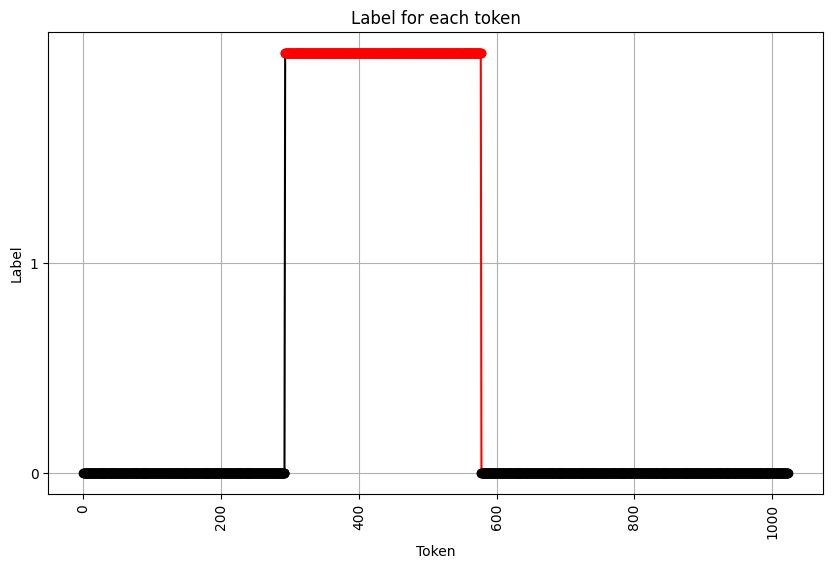

MALVSQSIKNLKGGISQQPEILRYPEQGSFQVNGWSSETEGLQKRPPMVFIKSLGGRGYLGEDPYIHLINRDEYEQYYAVFTGNDVRVFDLSGYEYQVRGDRSYVTVNNPKDNLRMVTVADYTFIVNRTRQVRESQHLTNGGTFRDNVDALINVRGGQYGRKLEVNINGVWVSHQLPPGDNAKDDPPKVDAQAIAEALATLLRAAHPTWTFNVGTGFIHCIAPADTTIDILETKDGYADQLINPVTHYVQSFSKLPLNAPDGYMVKIVGDTSKTADQYYVKYDKSQKVWKETVGWNISVGLEYHTMPWTLVRAADGNFDLGYHDWKDRRAGDDDTNPQPSFVNSTITDVFFFRNRLGFISGENIVMSRTSKYFEFYPPSVANYTDDDPLDVAVSHNRVSVLKYAVSFAEELLLWSDEAQFVLSANGVLSAKTAQLDLTTQFDVSDRARPYGIGRNIYYAAPRSSFTSIMRYYAVQDVSSVKNAEDMTAHVPNYIPNGVFSINGSGTENFACVLTKGAPSKVFIYKFLYMDENIRQQSWSHWDFGEDVEVMAASCINSTMYMLMRNGYNVWIAAVDFKKESTDFPFEPYRFHVDSKRSYHISETAYDIETNQTVVNVKDIYNASFDKGTVAICESDGKITEYEPTGDSWDSTPDIRISGDVSGKDIVIGFLYEFRYVFSRFLIKQEQNDGTTSTEDSGRLQLRRAWVNYQDTGAFTVSVDNGNREFNYLVNARVGSTGLRLGQKATTTGQYRFPVTGNALYQEVSLSSFNASPVSIIGCGWEGNYTNRASGI


cds43/+/1/3054


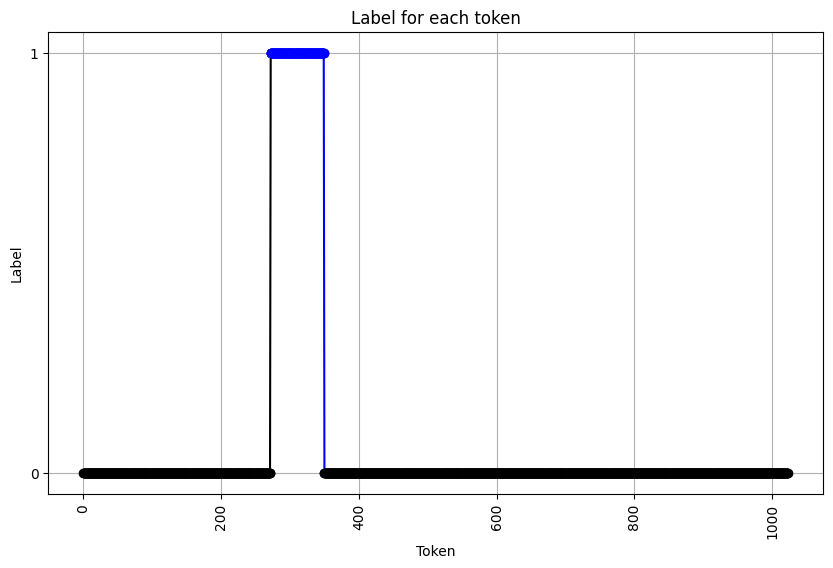

 61%|████████████████████████████████████████████████████████████████████████████████████████████                                                           | 25/41 [00:38<00:33,  2.09s/it]

MDQDTKTIIQYPTGGDEYDIPFDYLSRKFVRVSLVSDTQRLLLDNITDYRYVSRTRVKLLVSTDGYSRVEIRRFTSASEMVVDFSDGSVLRATDLNVSALQSAHIAEEARDLFSTSLSIGQLSYFDAKGLQIKNVAAGVDNTDAVTVQQLNKIIADVVTTIPDSVADNIRGLWARVLGDIGITLVDGSFESGATITTRTQALWSISGRKCYTWAGALPKVVPENSTPESTGGISETAWVDSSSKALGVLLAGPSGAARVGLKQGGTVQDAINWLTFDSFNIVKDGSKDVTADIMAACVVANDLGLDIKQNDGTYLVSGNPVWPVYNSLDLNGVTLKLAAGFSGYFALTQKDSTTVYGPTSPIVQAINAAGGRTAGSGVLEGLVNSTELNGKFLFMEGADVLYYSRGTAKYWWTNTYLSNRGKLSDNLKYGVSAITQITAVTPRTKIVYYRLPNLDFGNGPANNGVIRVLNNTRFIMQGGSISNRPLKDVSKSPVIISLNYCAAFKAYDFFDPYPAFAVDSNNSLVYSYTLNFNDIADAVFENFNSQGYGWGVVGGQRSTNITYRDCNLNRVDMHDPYMGYLKVLDTRLGTWGINASGMGDMYLERVTVDLDDSAHGGYREHEGIINARGDFGGFHDGGLYIKDLTIVGEASAFEAASGHPVALVSAYSFNASLAYIPESSPVTPWGFKEVIVEGLHCPFKRTGRRFNSIISAPSIQFTVYHPMRVKLEDCNFNSTAFEKFDLRGWRVTPYNPSKVGIANTLAFRPTNFVDVKDCSMVGLEFTRPLSAYDYSNFDVNLVNVKNVEEHSLSPFTLYTNQCGRYNLVGCGLQQIVDKSMTTGERANRRSTFSVTGGTWNSLSGNPTDITYGNGYDIPVVATGVMFVGPYSQTEVTGANLNVAEFVQASGCKFLSSGPTYIQPLLWSGAAGPTGASANFNVARGNTLGLNISAVNGETSQVIAATLVIPQGFSTGPASGTTYGFAVEKNINYQLGLNARSLKAN

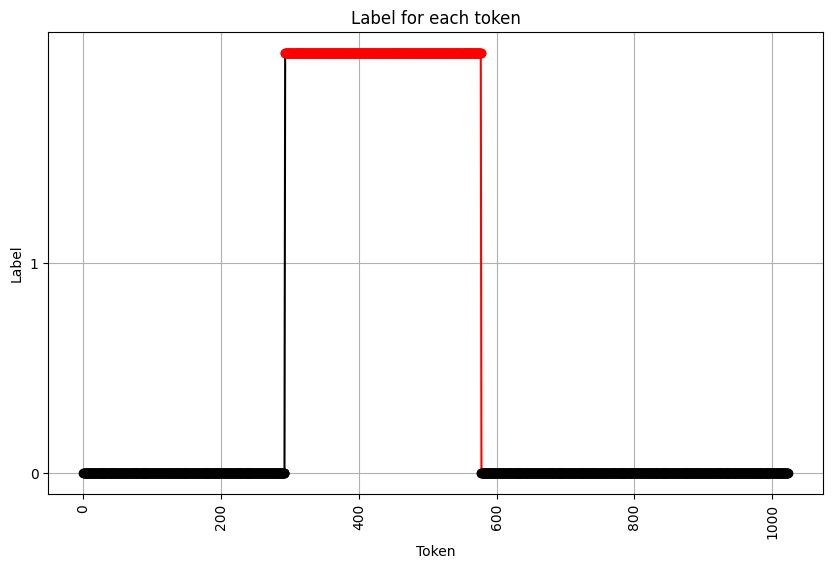

MALVSQSIKNLKGGISQQPEILRYPEQGTLQVNGWSSETEGLQKRPPMVFIKSLGGRGYLGEDPYIHLINRDEYEQYYAVFTGNDVRVFDLSGYEYQVRGDRSYVAVNNPKDNLRMVTVADYTFIVNRTRQVRENQNLTNGGTFRDNVDALINVRGGQYGRKLEVNINGVWVSHQLPPGDNAKEDPPKVDAQAIAEAIATLLRAAHPTWTFNVGTGFIHCIAPADTTIDILETKDGYADQLINPVTHYVQSFSKLPLNAPDGYMVKIVGDTSKTADQYYVKYDKGQKVWKETVGWNISVGLEYHTMPWTLVRAADGNFDLGYHDWKDRRAGDDDTNPQPSFVNSTITDVFFFRNRLGFISGENIVMSRTSKYFEFYPPSVANYTDDDPLDVAVSHNRVSVLKYAVSFAEELLLWSDEAQFVLSANGVLSAKTAQLDLTTQFDVSDRARPYGIGRNIYYAAPRSSFTSIMRYYAVQDVSSVKNAEDMTAHVPNYIPNGVFSINGSGTENFACVLTKGAPSKVFIYKFLYMDENIRQQSWSHWDFGEDVEVMAASCINSTMYMLMRNGYNVWIAAVDFKKESTDFPFEPYRFHVDSKRSYHISETAYDVETNQTVVNVKDIYNASFDKGTVAICESDGKITEYEPTGDSWDSTPDIRISGDVSGKDIVIGFLYEFRYVFSRFLIKQEQNDGTTSTEDSGRLQLRRAWVNYQDTGAFTVSVDNGNREFNYLVNARVGSTGLRLGQKATTTGQYRFPVTGNALYQEVSLSSFNASPVSIIGCGWEGNYTNRASGI


cds41/+/1/3054


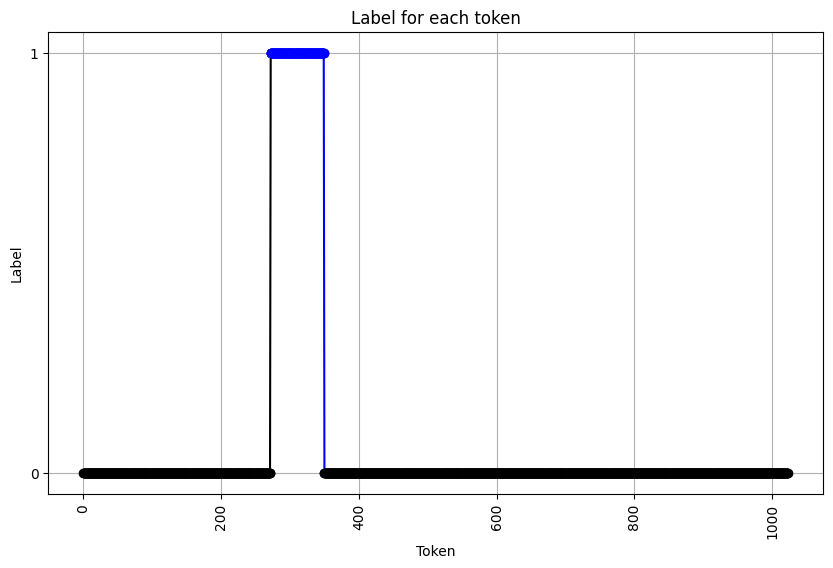

 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 28/41 [00:42<00:21,  1.63s/it]

MDQDTKTIIQYPTGSDEYDIPFDYLSRKFVRVSLVSDTQRLLLDNITDYRYVSRTRVKLLVSTDGYSRVEIRRFTSASEMVVDFSDGSVLRATDLNVSALQSAHIAEEARDLFSTSLSIGQLSYFDAKGLQIKNVAQGVDNTDAATVQQLNKIIADVVTTIPDSVADNIRGLWARVLGDIGITLVDGSFESGATITTRTQALWSISGRKCYTWAGTLPKVVPENSTPESTGGISETAWVDSSSKALGVLLAGPSGAERVGLKQGGTVQDAINWLTFDSFDIVKDGSKDVTADIMTACVVANDLGLDIKQNDGTYLVSGNPVWPVYNSLDLNGVTLKLAAGFSGYFALTQKDSTTVYGPTSPIVQAINAAGGRTAGSGVLEGLVNSTELNGKFLFMEGADVLYYSRGTAKYWWTNTYLSNRGKLSDNLKYGVSAITKITAVTPRTKIVYYHLPNLDFGNGPANNGVIRVLNNTRFIMQGGSISNRPLKDVSKRPVIISLNYCAAFKAYDFFDPYPAFAVDSNNSLVYSYTLNFNDIADAVFENFNSQGYGWGVVGGQRSTNITYRDCNLNRVDMHDPYMGYLKVLDTRLGTWGINASGMGDMYLERVTVDLDDSAHGGYREHEGIINARGDFGGFHDGGLYIKDLTIVGEASAFEAASGHPVALVSAYSFNASLAYIPESSPVTPWGFKEVIVEGLHCPFKRTGRRFNSIISAPSIQFTVYHPMRVKLEDCNFNSTAFEKFDLRGWRVTPYNPSKVGIANTLAFRPTNFVDVKDCSMVGLEFTRPLSAYDYSNFDVNLVNVKNVEEHSLSPFTLYTNQCGRYNLVGCGLQQIVDKSMTTGERANRRSTFSVTGGTWNSLSGNPTDITYGNGYDIPVVATGVMFVGPYSQTEVTGANLNVAEFVQASGCKFLSSGPTYIQPLLWSGAAGPTGASANFNVARGNTLGLNISAVNGETSQVIAATLVIPQGFSTGPASGTTYGFAVEKNINYQLGLNARSLKAN

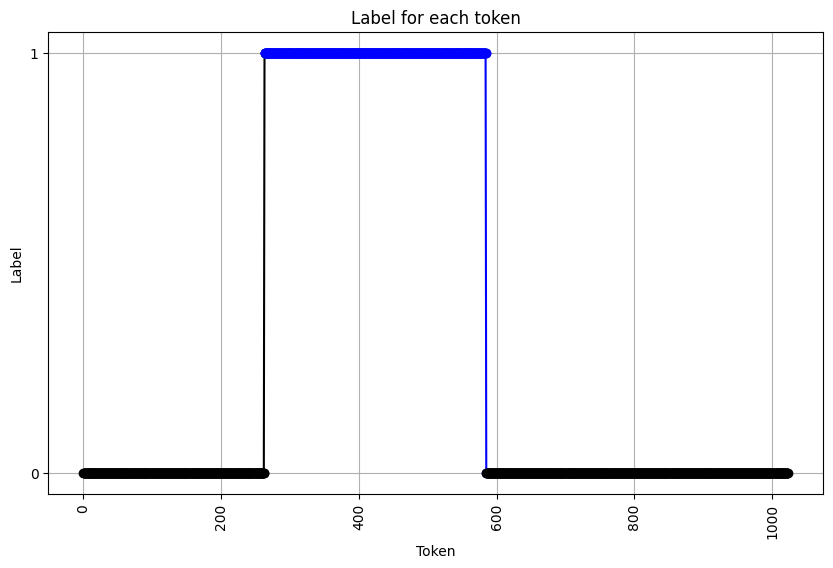

 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 29/41 [00:44<00:19,  1.64s/it]

MALYREGKAAMAADGTVTGTGTKWQSSLSLIRPGATIMFLSSPIQMAVVNKVVSDTEIKAITTKGAVVASSDYAILLSDSLTVDGLAQDVAETLRYYQSQETVIADAVDFFKTFDFESLQNLANQVKADSQSAGTSAAAAAASETAAKTSEINAKASEVAAETARDQVQHIIDNAGDQSTLAALAQSSGLKNIGQCANLTALRSLQFSSVGQQVFLKEHTTGQNAGGGIWYCHSMTSDSSYVDDNGCQIINDYGQVIRRKDVKELTSSYFGLRAGDTIDHVLTNMYKASRTFNIYEAKIENPGFDKGYVLQGGLRFYCGDKPFYILSYSLGTLRGPNLWHTGDNIGITFSRFKTDGTSEQAWSGGGIRGFRFWGAASYLVQGNDGVNATPVRLSDMWQGEACDFWVTGYTGNTNGAVVSLYNEFAWTEGSIVENIMVRQSIRGLTFLRNPGTTATDSFFRIVADMSFNAGVSGKSTQVMVVGDGTPAGACLVYGHDIKLTQWMSAGSWHDIVRLEDHSIIAETGVIKIVADGYGISKSTVPATEVVHSINVRGLNARFRSRVENWSNQAGGWGLDFLNIIFQSSMYTNAMTFYESDFDALPTINPVGMKIRFNGTFTVEERQSGKIYTLNGLIPGMTLKVKLTSRNGNDLGDAVVQEWKVFVRSTNFPCIVVPMSGGANIATTDGLAVTNTSPVQTATFLKTVTPTQARNFIGQNYGLTVKNANDDNSLSYAVNSGRKIRFILPANPGATTTTPYSVEIEVL


cds22/+/1/1080


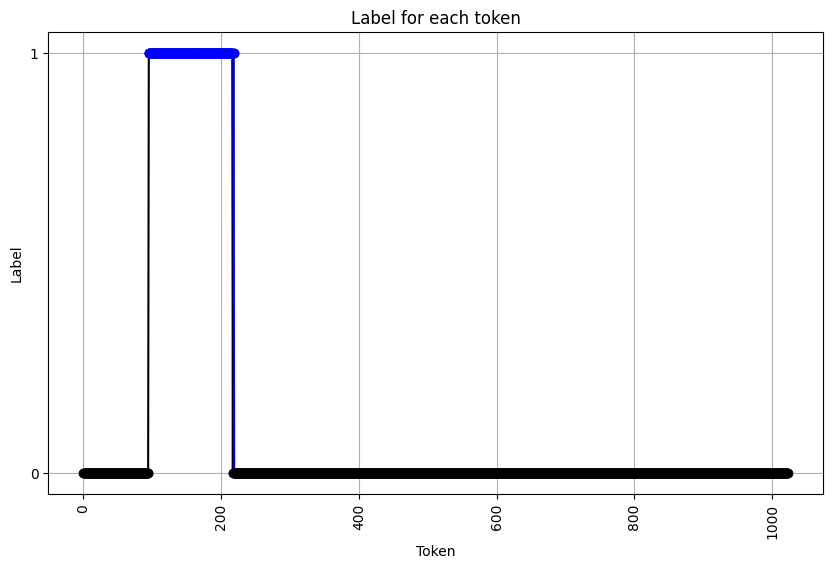

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 30/41 [00:45<00:17,  1.55s/it]

MATILIKDRLRQSVEAASGGLQTIVYTKKGQPCFMNVLAKFDLSEIDSSLSGTHPAFIVDDKEFSQILIGTYQMRVIDGEMVSQPYSVPTRGVVSLPYAIQTARASGPGFHAITNAEWSALQCLAWKNQQYPKGANLNGCDVTDTSLYGIRVDGLPAGTTTGSGLIYTGSGPTDFRHNLAYNGISDLNGNANEHVSGLRCVYGELQVLANNNAASSSRDLLDRSADWRAISGEDGSLISPDGNGTTANSIKLKSGSVASAADYTLTLTSGRFQTATIVNSTGKAVTSLALKKLQILGLYPFLSTDSDFFIINTSVIGYAQRGGHNSNAADAGINALALSNLNINMGGNITSRLAYYPVA


cds14/-/1/2580


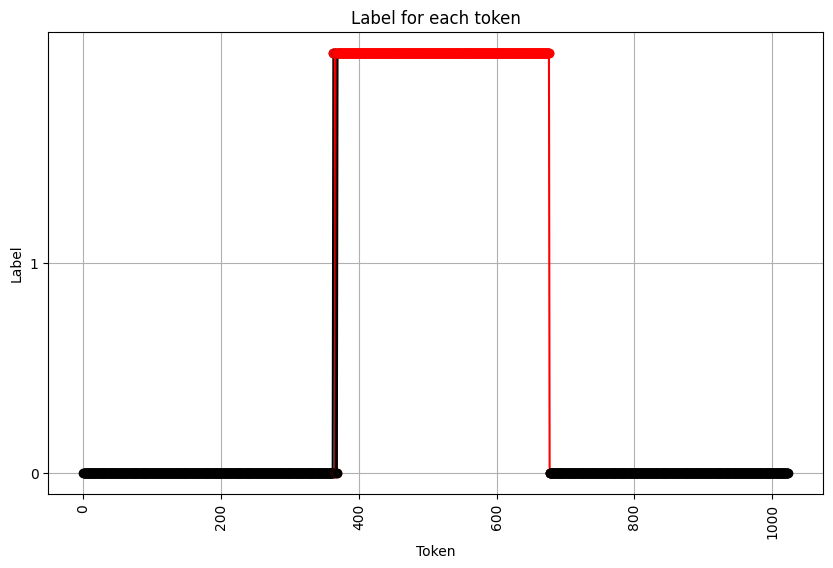

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 31/41 [00:47<00:16,  1.68s/it]

MKVQGSYQSVVLGVSQQVPHERRSGQMWEQVNMVSDPVRGVARRWGSVFLDARTVRDTEMSEADMQKAVNLYREAEYTCDGRDLVVLYAKGDTVPYGLPPVMAYDITQKKVLDVSGDGPLWDLLKTNGASSRVNIGRFLYLSVNNHKTTFTVQNRIKNMLDPKAGVLWIRQGNFSRKYEVTIVKPDGTSEVFEYTTPPASYPGKLDTSDIPIPDVPTNPGTDDGWTPSNTLLQQYQKDLAKYNKLISDRTNAYNSAVTNWIGEATEKMQPAYIAQQLAEKITAAGHAEVQSVGAYIAWSAASNIADAVPSENSDGTFMRAVAYQVDAVENLTPKHWVGHIVKVAAKKQDQKDAYYMEAFRKTEDGETFTDVIWRETAGQRTVPDSMFLHCWADLNTLYVASSPEGLNALAPDADAPGYESSSVGDALSSPAPGFFGKPINYMGVFQDRLLISSGAAVFASRPGDYLNWFRKTVLDILDNDPMEMYALGSEDDTIYWDTTFDRNLVLFGRKNQYIIPGRQTMSPKSPYIQIMSSIKDTVLAEPKASGSYVFYGKDTSVKGSVHQIQIGAVSDSSDSYEISQALDNYLKGRPLQLVTIQSPNNVVIRTTDYHYGLYIYTYLQNMNGGERVFDSWSRWEWPEALGMCVGMCDDDGTLLVFKLRNHNGATTLQAERFSFETELPDTGYLDCNRPMDLAVPMESGRAAHYVGGHPYYLLGSRLDKIDSNMSWWQEDVEHLRTGFITEAYVVPTSPYMRDRNDNPITTGRLTLGSFKVNVEQTAGLYGQVTTADRTYDMVDYGGRLLTRKSNQVGRVPLVDTSLSVPVYREIREFQLRLQARDWLPLTITGLEWVGQWFNRTQRV


cds42/-/1/1080


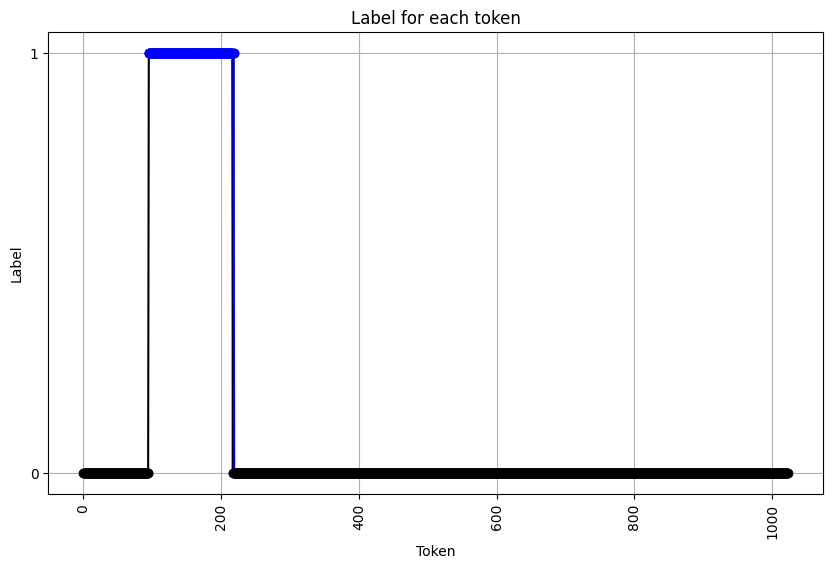

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 32/41 [00:48<00:14,  1.57s/it]

MATILIKDRLRQSVEAASGGLQTIVYTKKGQPCFMNVLAKFDLSEIDSSLSGTHPAFIVDDKEFSQILIGTYQMRVIDGEMVSQPYSVPTRGVVSLPYAIQTARASGPGFHAITNAEWSALQCLAWKNQQYPKGANLNGCDVTDTSLYGIRVDGLPAGTTTGSGLIYTGSGPTDFRHNLAYNGISDLNGNANEHVSGLRCVYGELQVLANNNAASSSRDLLDRSADWRAISGEDGSLISPDGNGTTANSIKLKSGSVASAADYTLTLTSGRFQTATIVNSTGKAVTSLALKKLQILGLYPFLSTDSDFFIINTSVIGYAQRGGHNSNAADAGINALALSNLNINMGGNITSRLAYYPVA


cds22/-/1/3732


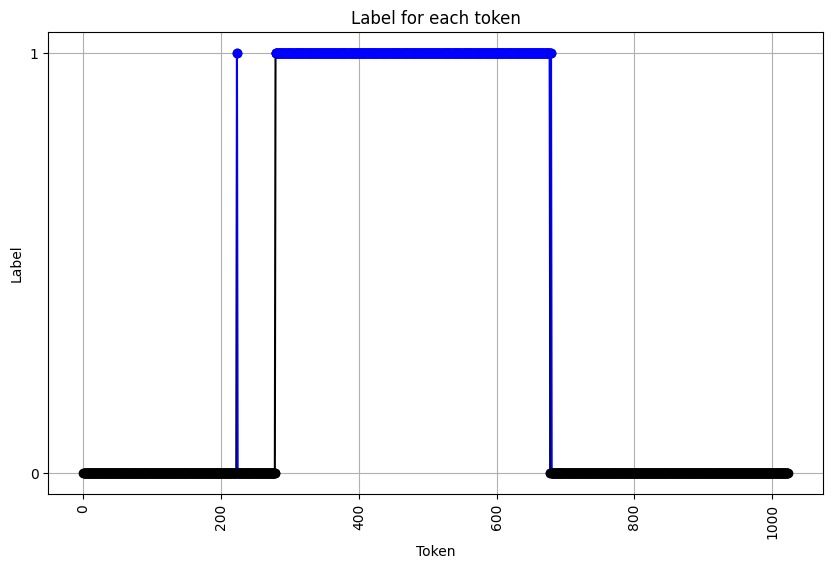

MMNQDIKTVIQYPVGATEFDIPFDYLSRKFVRVSLVADDNRRLLSNITEYRYVSKTRVKLLVETTGFDRVEIRRFTSASERVVDFSDGSVLRAADLNVSQIQSAHIAEEARDGQYYSLNLNDIGQFDAKGTKVINLGAPTSPQDAATKLYVDTNDAALSQRILDEIKARAEGDIEMLRQAKMYSDSQIPGVLPDGATSVGYWLPSATSLMNDDSGHPVVRVRGFYTADDGGEGSWVWTNEVDAQKAGTHDILTASVYDKVGRRYRIDITIGAVNAAQNGARRLTYAQATDRTTDDFVCLGQVISGITSLMPLPVSTNNSESGYIGDYRINLTISPGRYRIGKESGGIDSGMVINAWGARVHVVAGKSYTRAITGKWIHGLVHGYDQIKRKWEAVGKQAFWGSVSLKDVVINGGFWIGDHDLRTPASECSAGVGTLLLNPEGVIMNGVHQRNFNWVHVAMGAMIEETWYRTSKGRLFDDNELDYPYVMDFMTSNVPPVTRRFGNFNRVAYHGCKFESGRRGVFRNGVDWSGCYNTEIINNIAWRNPANADGSLPEFIAVLTGTAFHMSAGYMGPAAAKDFNAGVASVYSSTQNIKFDATYTEWTYAFMMISSWGFVDSASRLQGLSLDLVSVYKDNFADYGQIIFEEGCFPTMSEDGSATYPAGFKHFDTPQGQSPYVIGKPVRDVGAFRNQGFDFKYATNNVYLTTGTDWESWRDRPYAREMFNAFGLQINSGTAFLPLQNPADKSMTCIWYKDFTGNFDTRKVIQFITAAAQEGPNADEALYKSYAERVVDFGNGYKMMMIPNKRLTAWDGIYTYARNASITVEVSADTPIALIAVEAYTGGVPLFPNGVPNYVPESSCASVVPTAPQVGFDSNLGGGLFFDGDVVGPWVHVRRNKVGRRITPQVTAGSVLSTRRVSGQGVTLESALKTTFTATIVSSNTDTTTISIPSASLPSVAVGIPLYVQSGSSTGFTGLAHLHLRVMLANGKADNKYVVNGKLG

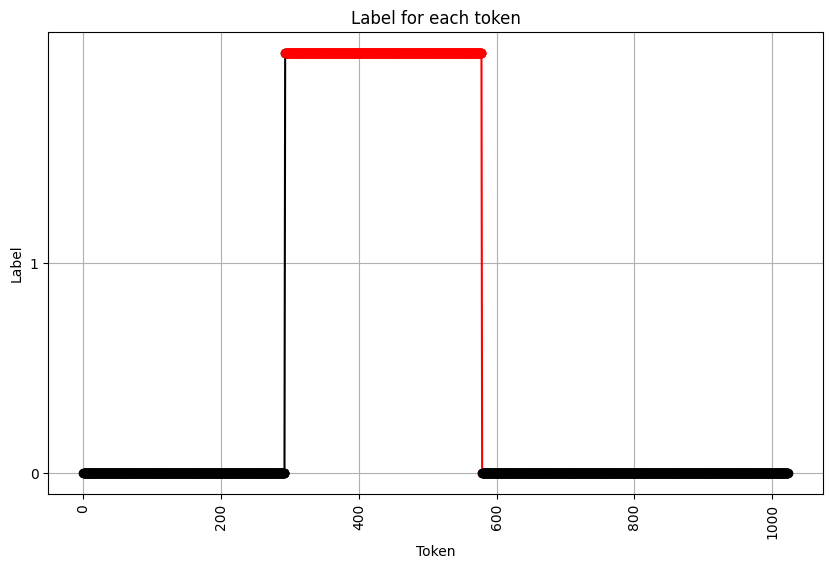

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 33/41 [00:53<00:18,  2.32s/it]

MALVSQSIKNLKGGISQQPEILRYPEQGSLQVNGWSSETEGLQKRPPMVFVKSLGGRGYLGEDPYIHLINRDEYEQYYAVFTGNDVRVFDLSGYEYQVRGDRSYVTVNNPKDNLRMVTVADYTFIVNRTRQVRESQNLTNGGTFRDNVDAIINVRGGQYGRKLEVNINGVWVSHQLPPGDNAKDDPPKVDAQAIAEALATLLRTAHPTWTFNVGTGFIHCIAPADTTLDVFETKDGYADQLINPVTHYVQSFSKLPLNAPDGYMVKIVGDTSKTADQYYVKYDKSQKVWKETVGWNIPIGLDYTTMPWTLVRAADGNFDLGYHDWKDRRAGDEDTNPQPSFVDSTITDVFFFRNRLGFISGENIVMSRTSKHFEFYPPSVANYTDDDPLDVAVSHNRVSVLKYAVSFAEELLLWSDEAQFVLSANGVLSAKTAQLDLTTQFDVSDRARPYGIGRNIYYASPRSSFTSIMRYYAVQDVSSVKNAEDMTAHVPNYIPNGVYSINGSGTENFACVLTKGAPSKVFIYKFLYMDEDIRQQSWSHWDFGDGVEVMAANCINSTMYMLMRNAYNVWIAAVDFKKDSTDFPFEPYRFHVDAKRSYHISETAYDIETNQTVVNVKDIYGASFSKGTVAICESDGKITEYEPTGSSWDSTPDIRISGDISGKDIVVGFLYDFQYVFSRFLIKQEQNDGTTSTEDSGRLQLRRAWVNYQDTGAFTVSVDNGSREFNYLVNARVGSTGLRLGQKATTTGQYRFPVTGNALYQKVSLSSFNASPVSIIGCGWEGNYMRRANGI


cds23/+/1/2376


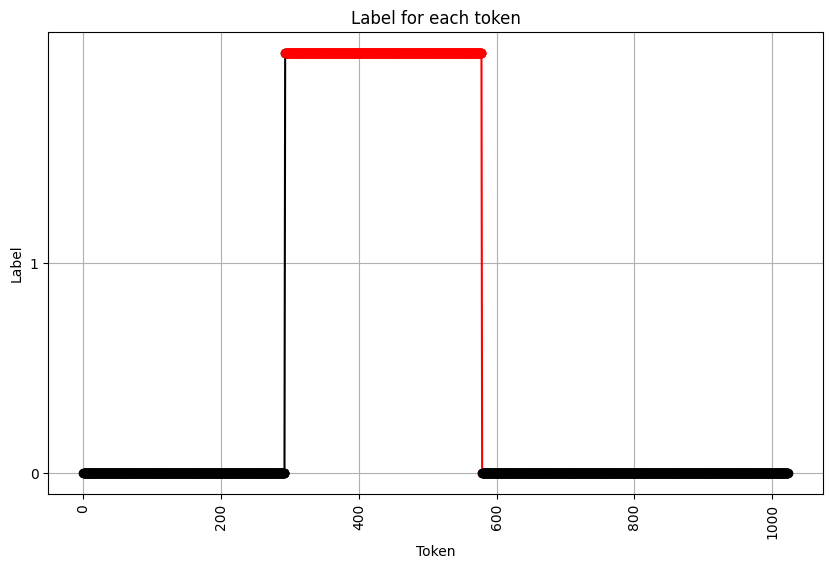

MALVSQSIKNLKGGISQQPEILRYPEQGTLQVNGWSSETEGLQKRPPMVFIKSLGPRGYLGEDPYIHLINRDEYEQYYAVFTGNDVRVFDLSGYEYQVRGDRSYVSVANPKDNLRMVTVADYTFIVNRTRQVRENQNVTNGGTFRDNVDGIVNVRGGQYGRKLEVNINGVWVSHQLPPGDNAKDDPPKVDAQAIAAALADLLRVAHPTWTFNVGTGYIHCIAPAGVTLDEFQTRDGYADQLINPVTHYVQSFSKLPLNAPDGYTVKIVGDTSKTADQYYVKYDASQKVWKETVGWNISVGLEYHTMPWTLVRAADGNFDLNYHEWTNRRAGDEDTNPQPSFVNSTITDVFFFRNRLGFISGENIVLSRTSKYFEFYPPSVANYTDDDPLDVAVSHNRVSVLKYAVSFAEELLLWSDEAQFVLSANGVLSAKTAQLDLTTQFDVSDRARPYGIGRNIYYASPRSSFTSIMRYYAVQDVSSVKNAEDMTAHVPNYIPNGVYSINGSGTENFACVLTKGAPSKVFIYKFLYMDEDIRQQSWSHWDFGDGVEVMAANCINSTMYLLMRNAYNVWIAAVDFKKESTDFPFEPYRFHVDAKRSYHISETAYDIETNQTVVNVKDIYGASFSKGTVAICESDGKITEYEPMGDSWDSTPDIRISGDVSGTNIVIGFLYDFQYVFSRFLIKQEQNDGTTSTEDSGRLQLRRAWVNYQNTGAFTVSVDNGSREFNYLVNARVGSTGLRLGQKATTTGQYRFPVTGNALYQKVSLSSFNASPVSIIGCGWEGNYSRRANGI


cds28/+/1/3054


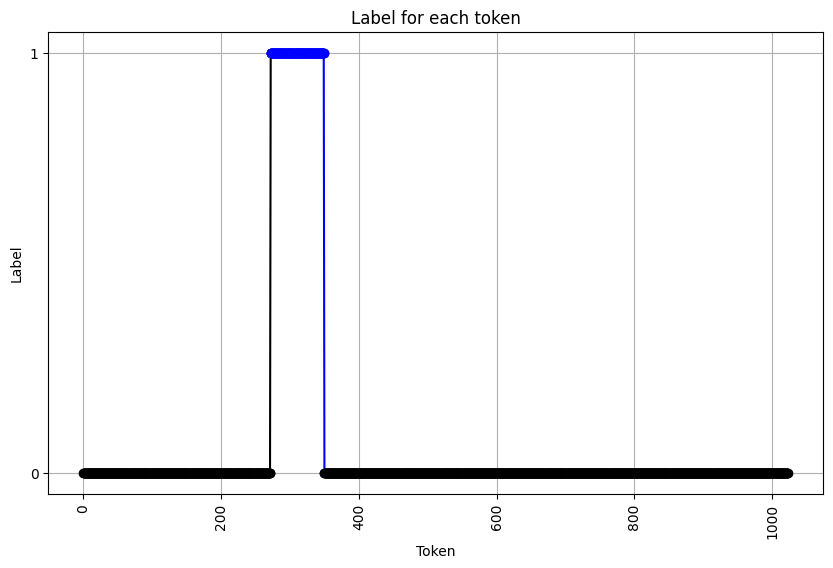

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 36/41 [00:57<00:08,  1.73s/it]

MDQDTKTIIQYPTSGDEYDIPFDYLSRKFVRVSLVSDTQRILLDNITDYRYVSRTRVKLLVSTDGYSRVEIRRFTSASEMVVDFSDGSVLRATDLNVSALQSAHIAEEARDLFSTSLSIGQLSYFDAKGLQIKNVAAGVDNTDAVTVQQLNKIIADVVTTIPDSVADNIRGLWERVLGDIGITLVDGSFETGATITTRTQALWSISGRKCYTWAGALPKVVPENSTPESTGGISETAWVDSSSKALGVLLAGPSGAERVGLKQGGTVQDAINWLTFDSFDIVKDGSKDVTADIMAACVVANDLGLDIKQNDGTYLVSGNPVWPVYNSLDLNGVTLKLAAGFTGYFALTQKDSTTVYGPTSPIVQAINAAGGRTAGSGVLEGLVNSTELNGKFLFMEGADVLYYSRGTAKYWWTNTYLSNRGKLSDNLKYGVSAITKITAVTPRTKIVYYRLPNLDFGNGPANNGVIRVLNNTRFIMQGGSISNRPLKDVSKSPVIISLNYCAAFKAYDFFDPYPAFAVDANNSLVYSYTLNFNDIADAVFENFNSQGYGWGVVGGQRSTNITYRDCNLNRVDMHDPYMGYLKVLDTRLGTWGINASGMGDMYLERVTVDLDDSAHGGYREHEGIINARGDFGGFHDGGLYIKDLTIVGEASAFEAASGHPVALVSAYSFNASLAYIPESSPVTPWGFKEVIVEGLHCPFKRTGRRFNSIISAPSIQFTVYHPMRVKLEDCNFNSTAFEKFDLRGWRVTPYNPSKVGIANTLAFRPTNFVDVKDCSMVGLEFTRPTSAYDYSNFDVNLVNVKNVEEHSLSPFTLYTNQCGRYTLVGCGLQQIVDKSMSSGERANRRSTFSVTGGTWNSLSGNPTDITYGNGYDIPVVATGVMFVGPYSQTEVTDANLNVAEFVQASGCKFLSSGPTYIQPLLWSGAGGPTGASANFNVARGNTLGLNISAVNGETSQTLAATLMIPQGFSTGHASGTTYGFSVAKSVNYQLSLNARSLKAN

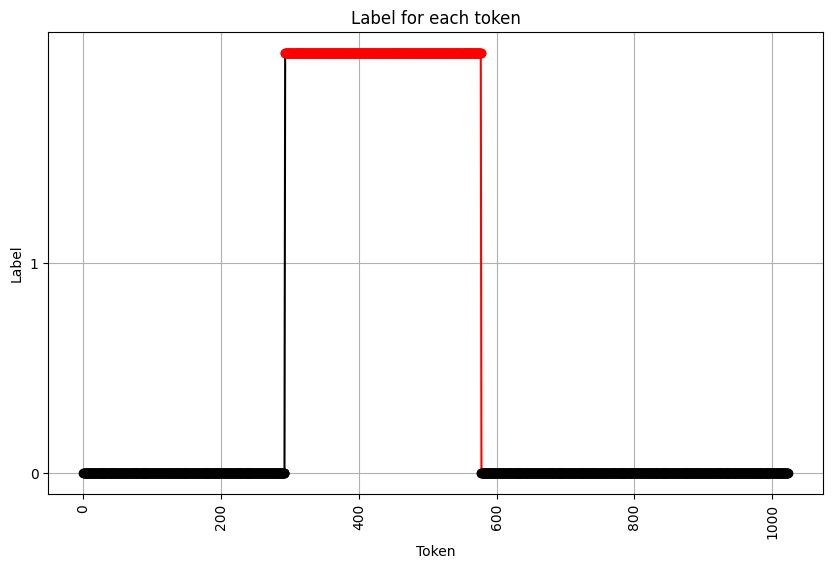

MALVSQSIKNLKGGISQQPEILRYPEQGSFQVNGWSSETEGLQKRPPMVFIKSLGGRGYLGEDPYIHLINRDEYEQYYAVFTGNDVRVFDLSGYEYQVRGDRSYVTVNNPKDNLRMVTVADYTFIVNRTRQVRESQHLTNGGTFRDNVDALINVRGGQYGRKLEVNINGVWVSHQLPPGDNAKDDPPKVDAQAIAEALATLLRAAHPTWTFNVGTGFIHCIAPADTTIDILETKDGYADQLINPVTHYVQSFSKLPLNAPDGYMVKIVGDTSKTADQYYVKYDKSQKVWKETVGWNISVGLEYHTMPWTLVRAADGNFDLGYHDWKDRRAGDDDTNPQPSFVNSTITDVFFFRNRLGFISGENIVMSRTSKYFEFYPPSVANYTDDDPLDVAVSHNRVSVLKYAVSFAEELLLWSDEAQFVLSANGVLSAKTAQLDLTTQFDVSDRARPYGIGRNIYYAAPRSSFTSIMRYYAVQDVSSVKNAEDMTAHVPNYIPNGVFSINGSGTENFACVLTKGAPSKVFIYKFLYMDENIRQQSWSHWDFGEDVEVMAASCINSTMYMLMRNGYNVWIAAVDFKKESTDFPFEPYRFHVDSKRSYHISETAYDIETNQTVVNVKDIYNASFDKGTVAICESDGKITEYEPTGDSWDSTPDIRISGDVSGKDIVIGFLYEFRYVFSRFLIKQEQNDGTTSTEDSGRLQLRRAWVNYQDTGAFTVSVDNGNREFNYLVNARVGSTGLRLGQKATTTGQYRFPVTGNALYQEVSLSSFNASPVSIIGCGWEGNYTNRASGI


cds44/+/1/3054


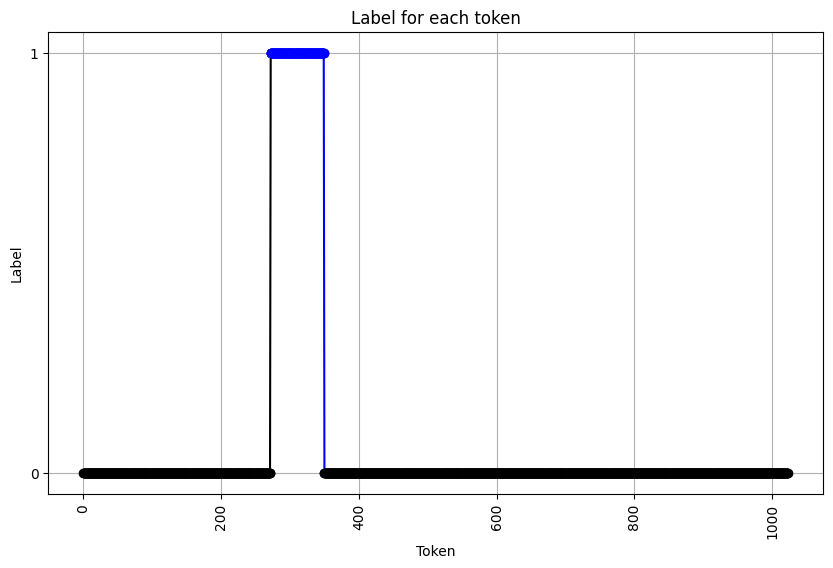

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 37/41 [01:01<00:09,  2.26s/it]

MDQDTKTIIQYPTGGDEYDIPFDYLSRKFVRVSLVSDTQRLLLDNITDYRYVSRTRVKLLVSTDGYSRVEIRRFTSASEMVVDFSDGSVLRATDLNVSALQSAHIAEEARDLFSTSLSIGQLSYFDAKGLQIKNVAAGVDNTDAVTVQQLNKIIADVVTTIPDSVADNIRGLWARVLGDIGITLVDGSFESGATITTRTQALWSISGRKCYTWAGALPKVVPENSTPESTGGISETAWVDSSSKALGVLLAGPSGAARVGLKQGGTVQDAINWLTFDSFNIVKDGSKDVTADIMAACVVANDLGLDIKQNDGTYLVSGNPVWPVYNSLDLNGVTLKLAAGFSGYFALTQKDSTTVYGPTSPIVQAINAAGGRTAGSGVLEGLVNSTELNGKFLFMEGADVLYYSRGTAKYWWTNTYLSNRGKLSDNLKYGVSAITQITAVTPRTKIVYYRLPNLDFGNGPANNGVIRVLNNTRFIMQGGSISNRPLKDVSKSPVIISLNYCAAFKAYDFFDPYPAFAVDSNNSLVYSYTLNFNDIADAVFENFNSQGYGWGVVGGQRSTNITYRDCNLNRVDMHDPYMGYLKVLDTRLGTWGINASGMGDMYLERVTVDLDDSAHGGYREHEGIINARGDFGGFHDGGLYIKDLTIVGEASAFEAASGHPVALVSAYSFNASLAYIPESSPVTPWGFKEVIVEGLHCPFKRTGRRFNSIISAPSIQFTVYHPMRVKLEDCNFNSTAFEKFDLRGWRVTPYNPSKVGIANTLAFRPTNFVDVKDCSMVGLEFTRPLRAYDYSNFDVNLVNVKNVEEHSLSPFTLYTNQCGRYNLVGCGLQQIVDKSMTTGERANRRSTFSVTGGTWNSLSGNPTDITYGNGYDIPVVATGVMFVGPYSQTEVTGANLNVAEFVQASGCKFLSSGPTYIQPLLWSGAAGPTGASANFNVARGNTLGLNISAVNGETSQVIAATLVIPQGFSTGPASGTTYGFAVEKNINYQLGLNARSLKAN

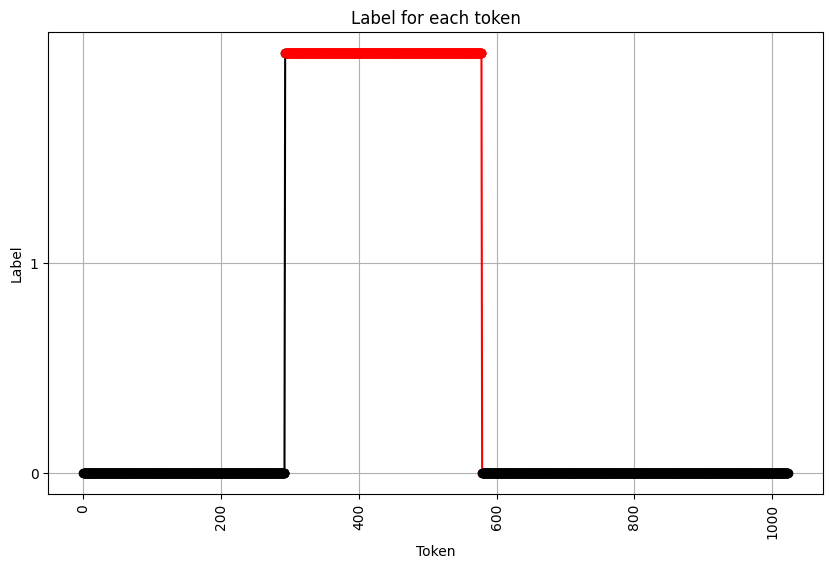

MALVSQSIKNLKGGISQQPEILRYPEQGSLQVNGWSSETEGLQKRPPMVFIKSLGGRGYLGEDPYIHLINRDEYEQYYAVFTGNDVRVFDLSGYEYQVRGDRSYVTVNNPKDNLRMVTVADYTFIVNRTRQVRESQNLTNGGTFRDNVDAIINVRGGQYGRKLEVNINGVWVSHQLPPGDNAKEDPPKVDAQAIAEALATLLRTAHPTWTFNVGTGYIHCVAPANTTIDILETKDGYADQLINPVTHYVQSFSKLPLNAPDGYMVKIVGDTSKTADQYYVKYDKGQKVWKETVGWNISIGLDYTTMPWTLVRAADGNFDLGYHDWKDRRAGDEDTNPQPSFVNSTITDVFFFRNRLGFISGENIVMSRTSKYFEFYPPSVANYTDDDPLDVAVSHNRVSVLKYAVSFAEELLLWSDEAQFVLSANGVLSAKTAQLDLTTQFDVSDRARPYGIGRNIYYASPRSSFTSIMRYYAVQDVSSVKNAEDMTAHVPNYIPNGVYSINGSGTENFACVLTKGAPSKVFIYKFLYMDENIRQQSWSHWDFGDGVEVMAANCINSTMYMLMRNAYNVWIAAVDFKKDSTDFPFEPYRFHVDAKRSYHISETAYDIETNQTIVNIKDIYGASFYNGTVAICESDGKITEYEPTGSSWDSTPDIRISGDISGKDIVIGFLYDFQYVFSQFLIKQEQNDGTTSTEDSGRLQLRRAWVNYQDTGAFTVSVDNGSREFNYLVNARVGSTGLRLGQKATTTGQYRFPVTGNALYQKVSLSSFNASPVSIIGCGWEGNYMRRANGI


cds42/+/1/3732


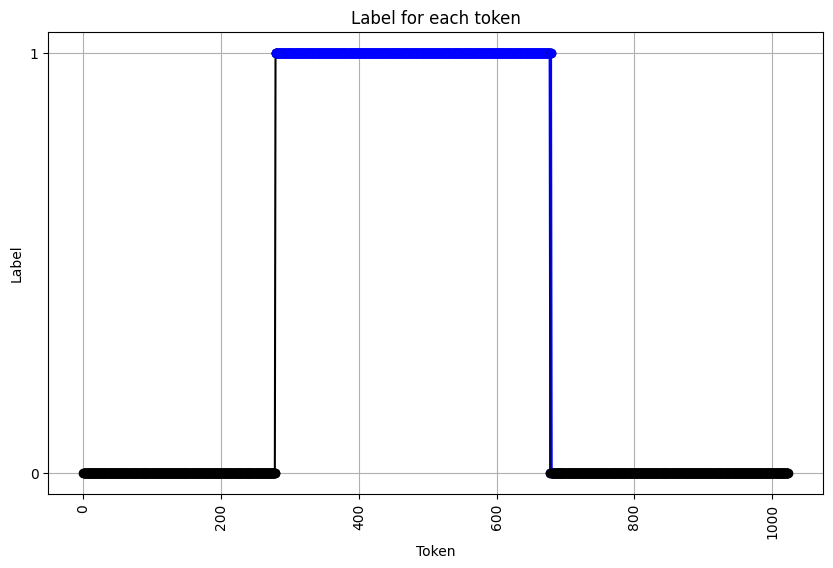

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 38/41 [01:05<00:08,  2.74s/it]

MMNQDVKTVIQYPVGATEFDIPFDYLSRKFVRVSLVADDNRRLLSNITEYRYVSKTRVKLLVETTGFDRVEIRRFTSASERVVDFSDGSVLRAADLNVSQIQSAHIAEEARDGQYYSLNLNDLGQFDAKGTKIINLGAPTSPQDATTKLYVDTNDAALSQRILDEIKARAEGDIEMLRQAKMYSDSQIPGVLPDGATSVGYWLPSATALMNDDSGHPVVRVRGFYTADDGGEGSWVWTNEVDAQKAGTHDILTASVYDKVGRRYRIDITIGAVNAAQNGARRLTYAQATDRTTDDFVCLGQVISGITSLMPLPVSTNNSESGYIGDYRINLTISPGRYRIGKESGGIDSGMVINAWGARVHVVAGKSYTRAITGKWIHGLVHGYDQIKRKWEAVGKQAFWGSVSLKDVVINGGFWIGDHDLRTPASECSAGVGTLLLNPEGVIMNGVHQRNFNWVHVAMGAMIEETWYRTSKGRLFDDNELDYPYVMDFMTSNVPPVTRRFGNFNRVAYHGCKFESGRRGVFRNGVDWSGCYNTEIINNIAWRNPANADGSLPEFIAVLTGTAFHMSAGYMGPAAAKDFNAGVASVYSSTQNIKFDATYTEWTYAFMMISSWGFVDSASRLQGLSLDLVSVYKDNFADYGQIIFEEGCFPTMSEDGSATYPAGFKHFDTPQGQSPYVIGKPVRDVGAFRNQGFDFKYATNNVYLTTGTDWESWRDRPYAREMFNAFGLQINSGTAFLPLQNPADKSMTCIWYKDFTGNFDTRKVIQFITAAAQEGPNADEALYKSYAERVVDFGNGYKMMMIPNKRLTAWDGIYTYARNASITVEVSADTPIALIAVEAYTGGVPLFPNGVPNYVPESSCASVVPTAPQVGFDSNLGGGLFFDGDVVGPWVHVRRNKVGRRITPQVTAGSVLSTRRVSGQGVTLESALKTTFTATIVSSNADTTTISIPSASLPSVAVGIPLYVQSGSSTGFTGLAHLHLRVMLANGKADNKYVVNGKLG

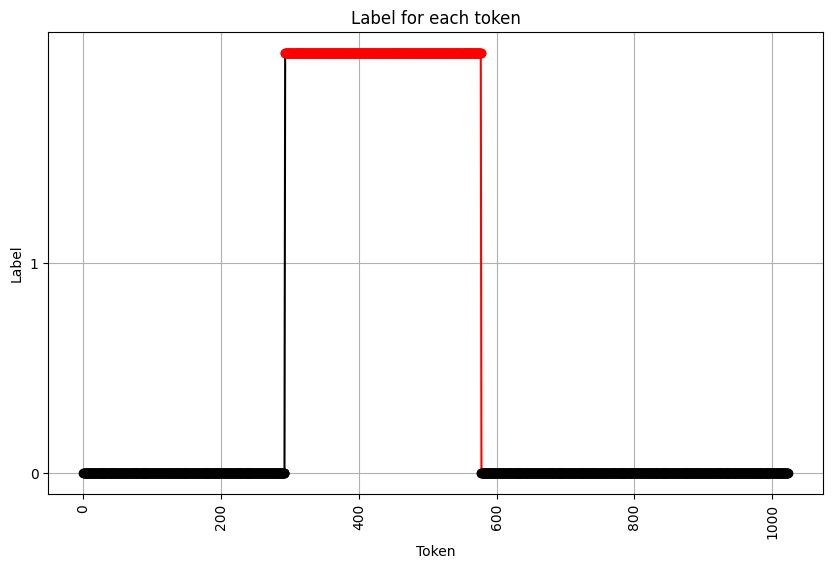

MALVSQSIKNLKGGISQQPEILRYPEQGSFQVNGWSSETEGLQKRPPMVFIKSLGGRGYLGEDPYIHLINRDEYEQYYAVFTGNDVRVFDLSGYEYQVRGDRSYVTVNNPKDNLRMVTVADYTFIVNRTRQVRESQHLTNGGTFRDNVDALINVRGGQYGRKLEVNINGVWVSHQLPPGDNAKDDPPKVDAQAIAEALATLLRAAHPTWTFNVGTGFIHCIAPADTTIDILETKDGYADQLINPVTHYVQSFSKLPLNAPDGYMVKIVGDTSKTADQYYVKYDKSQKVWKETVGWNISVGLEYHTMPWTLVRAADGNFDLGYHDWKDRRAGDDDTNPQPSFVNSTITDVFFFRNRLGFISGENIVMSRTSKYFEFYPPSVANYTDDDPLDVAVSHNRVSVLKYAVSFAEELLLWSDEAQFVLSANGVLSAKTAQLDLTTQFDVSDRARPYGIGRNIYYAAPRSSFTSIMRYYAVQDVSSVKNAEDMTAHVPNYIPNGVFSINGSGTENFACVLTKGAPSKVFIYKFLYMDENIRQQSWSHWDFGEDVEVMAASCINSTMYMLMRNGYNVWIAAVDFKKESTDFPFEPYRFHVDSKRSYHISETAYDIETNQTVVNVKDIYNASFDKGTVAICESDGKITEYEPTGDSWDSTPDIRISGDVSGKDIVIGFLYEFRYVFSRFLIKQEQNDGTTSTEDSGRLQLRRAWVNYQDTGAFTVSVDNGNREFNYLVNARVGSTGLRLGQKATTTGQYRFPVTGNALYQEVSLSSFNASPVSIIGCGWEGNYTNRASGI


cds47/-/1/3054


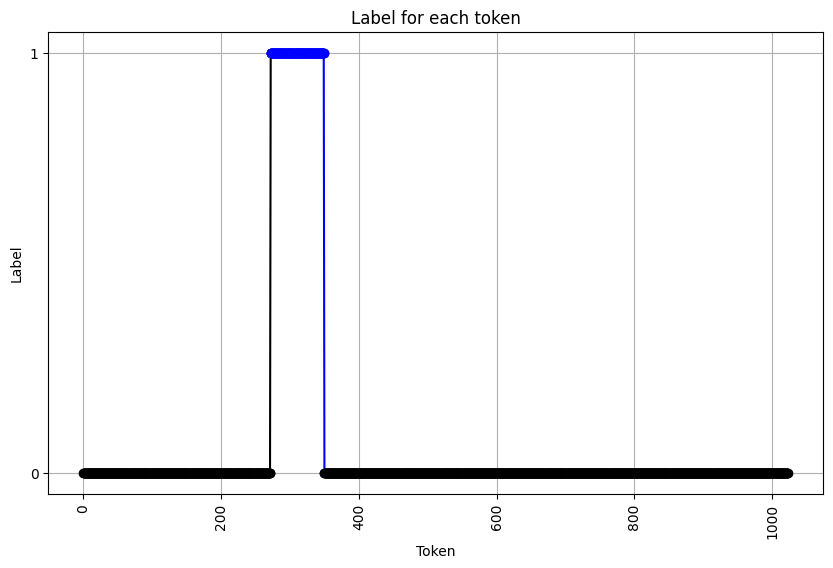

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 41/41 [01:09<00:00,  1.70s/it]

MDQDTKTIIQYPTGGDEYDIPFDYLSRKFVRVSLVSDTQRLLLDNITDYRYVSRTRVKLLVSTDGYSRVEIRRFTSASEMVVDFSDGSVLRATDLNVSALQSAHIAEEARDLFSTSLSIGQLSYFDAKGLQIKNVAAGVDNTDAVTVQQLNKIIADVVTTIPDSVADNIRGLWARVLGDIGITLVDGSFESGATITTRTQALWSISGRKCYTWAGALPKVVPENSTPESTGGISETAWVDSSSKALGVLLAGPSGAARVGLKQGGTVQDAINWLTFDSFNIVKDGSKDVTADIMAACVVANDLGLDIKQNDGTYLVSGNPVWPVYNSLDLNGVTLKLAAGFSGYFALTQKDSTTVYGPTSPIVQAINAAGGRTAGSGVLEGLVNSTELNGKFLFMEGADVLYYSRGTAKYWWTNTYLSNRGKLSDNLKYGVSAITQITAVTPRTKIVYYRLPNLDFGNGPANNGVIRVLNNTRFIMQGGSISNRPLKDVSKSPVIISLNYCAAFKAYDFFDPYPAFAVDSNNSLVYSYTLNFNDIADAVFENFNSQGYGWGVVGGQRSTNITYRDCNLNRVDMHDPYMGYLKVLDTRLGTWGINASGMGDMYLERVTVDLDDSAHGGYREHEGIINARGDFGGFHDGGLYIKDLTIVGEASAFEAASGHPVALVSAYSFNASLAYIPESSPVTPWGFKEVIVEGLHCPFKRTGRRFNSIISAPSIQFTVYHPMRVKLEDCNFNSTAFEKFDLRGWRVTPYNPSKVGIANTLAFRPTNFVDVKDCSMVGLEFTRPLSAYDYSNFDVNLVNVKNVEEHSLSPFTLYTNQCGRYNLVGCGLQQIVDKSMTTGERANRRSTFSVTGGTWNSLSGNPTDITYGNGYDIPVVATGVMFVGPYSQTEVTGANLNVAEFVQASGCKFLSSGPTYIQPLLWSGAAGPTGASANFNVARGNTLGLNISAVNGETSQVIAATLVIPQGFSTGPASGTTYGFAVEKNINYQLGLNARSLKAN

In [7]:
dpos = [dpo[1] for file in prediction_results for dpo in prediction_results[file]]

for phage in tqdm(os.listdir(path_out)) :
    fastas = SeqIO.parse(f"{path_out}/{phage}/{phage}_cgp_protein.faa" , "fasta")
    tmp_results = []
    for record in fastas :
        protein_seq = str(record.seq)
        if record.id in dpos and len(protein_seq) >= 200:
            print(record.id)
            prediction, sequence_outputs = predict_sequence(model_classifier, protein_seq)
            plot_token(sequence_outputs)
            print(protein_seq)
            print("\n")